<center><h1> Netflix Case Study

In [4717]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Table of Content
- 1 **Data Exploration**
    - 1.1. Data Read
    - 1.2. Initial Exploration
    - 1.3. Data type Handling
- 2 **Pre Processing (Missing values Imputation)**
    - 2.1 Duration
    - 2.2 Rating
    - 2.3 Date_Added
    - 2.4 Country
    - 2.5 Cast
    - 2.6 Director
    - 2.7 To CSV 
- 3 **Analysis**
    - 3.1. Problem Statement
    - 3.2. Column Analysis
    - 3.3. Restructuring Data
    - 3.4. Statistical Analysis
    - 3.5. Graphical Analysis
        - 3.5.1. Univariate Analysis
        - 3.5.2. Bivariate / Multivariate Analysis
        - 3.5.3. Correlation
    - 3.6. Missing Value / Outliers  
- 4 **Insights**
    - 4.1. Business Insights
    - 4.2. Recommendations

## 1. Data Exploration

### 1.1 Data Read

In [4718]:
df = pd.read_csv("netflix.csv")

In [4719]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### 1.2. Initial Exploration

In [4720]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Data Types
- **release_year, date_added** data type not in Date time format

#### NaN
- **rating, duration** have very less Null values.
- **date_added** has moderate level of null values  
- **director, cast, country** have very high amount of Null values
- **show_id, type, title, release_year, listed_in, description**, no null values observed


### 1.3 Data Type Handling

In [4721]:
df["date_added"]  = df["date_added"].astype("datetime64")

In [4722]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4723]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [4724]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## 2. Preprocessing

### 2.1 Duration

In [4725]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [4726]:
df.loc[(df["rating"].str.contains("min")) & (df["rating"].isna()==False),"duration"] = df["rating"]
df.loc[(df["rating"].str.contains("min")) & (df["rating"].isna()==False),"rating"] = np.nan

In [4727]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

### 2.2 Rating

In [4728]:
df["listed_in"] = df["listed_in"].str.split(", ")

In [4729]:
exploded_df = df.explode(["listed_in"])

In [4730]:
exploded_df["rating"].isna().sum()

9

In [4731]:
def my_mode(x):
    try:
        return x.mode()[0]
    except:
        return x

In [4732]:
rating_by_genre_type = exploded_df.groupby(["type","listed_in"])["rating"].agg(my_mode)
rating_by_genre_type.head()

type   listed_in               
Movie  Action & Adventure              R
       Anime Features              TV-14
       Children & Family Movies       PG
       Classic Movies                  R
       Comedies                    TV-14
Name: rating, dtype: object

In [4733]:
rating_by_genre_type.isna().sum()

0

In [4734]:
def rating_impute(x):
    x['rating'] = rating_by_genre_type.loc[x["type"], x["listed_in"]]
    return x

In [4735]:
exploded_df.loc[exploded_df["rating"].isna()] = exploded_df.loc[exploded_df["rating"].isna()].apply(rating_impute, axis=1)

In [4736]:
exploded_df = exploded_df.groupby("show_id")["rating"].agg(lambda x: x.mode()[0])
exploded_df

show_id
s1       PG-13
s10      PG-13
s100     TV-MA
s1000    TV-MA
s1001    TV-MA
         ...  
s995     TV-14
s996     TV-MA
s997     TV-MA
s998     TV-PG
s999     TV-14
Name: rating, Length: 8807, dtype: object

In [4737]:
def rating_impute_2(x):
    x["rating"] = exploded_df[x["show_id"]]
    return x

In [4738]:
df[df["rating"].isna()] = df[df["rating"].isna()].apply(rating_impute_2,axis=1)

### 2.3 Date_Added

In [4739]:
def my_mode(x):
    try:
        return x.mode()[0]
    except:
        return x

In [4740]:
date_added_by_release_year = df.groupby(["type","release_year"])["date_added"].agg(my_mode)
date_added_by_release_year.head()

type   release_year
Movie  1942           2017-03-31
       1943           2017-03-31
       1944           2017-03-31
       1945           2017-03-31
       1946           2017-03-31
Name: date_added, dtype: datetime64[ns]

In [4741]:
def date_added_impute(x):
    x["date_added"] = date_added_by_release_year.loc[x["type"],x["release_year"]]
    return x

In [4742]:
df[df["date_added"].isna()] = df[df["date_added"].isna()].apply(date_added_impute, axis=1)

In [4743]:
df.isna().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

### 2.4 Country

In [4744]:
df["Franchise"] = np.where(
    (~df["title"].str.lower().str.split().str[0].isin(["the","a","an","my"])) & (~df["title"].str.lower().str.split().str[1].isin(["1","2","3","4","5","6","7","8","9","0"])),
    df["title"].str.split().str[0:2].str.join(" "),
    df["title"].str.split().str[0:3].str.join(" ")
)

df["Franchise"] = np.where(
    df["title"].str.lower().str.split().str[1].isin(["1","2","3","4","5","6","7","8","9","0"]),
    df["title"].str.split().str[0],
    df["Franchise"]
)

df["Franchise"] = np.where(
    df["title"].str.lower().str.split().str[1].isin(["and","&","or","in","to","at","into"]),
    df["title"].str.split().str[0:3].str.join(" "),
    df["Franchise"]
)


df["Franchise"] = df["Franchise"].str.replace(":","")
df["Franchise"] = df["Franchise"].str.replace("-","")

In [4745]:
df["listed_in"] = df["listed_in"].str.join(", ")
df["country"] = df["country"].str.split(", ")

exploded_df = df.explode("country")
exploded_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Franchise
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Dick Johnson
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Blood & Water
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Ganglands
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Jailbirds New
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Kota Factory


In [4746]:
def my_mode(x):
    try:
        return x.mode()[0]
    except:
        return x

In [4747]:
country_by_franchise = exploded_df[~exploded_df["country"].isna()].groupby("Franchise")["country"].agg(my_mode)
country_by_franchise

Franchise
#Alive                 South Korea
#AnneFrank                   Italy
#FriendButMarried        Indonesia
#Roxy                       Canada
#Rucker50            United States
                         ...      
​SAINT SEIYA                 Japan
​​Kuch Bheege                India
忍者ハットリくん                     Japan
마녀사냥                   South Korea
반드시 잡는다                South Korea
Name: country, Length: 7259, dtype: object

In [4748]:
def country_impute(x):
    try:
        x["country"] = country_by_franchise[x["Franchise"]]
        return x
    except:
        return x

In [4749]:
df[df["country"].isna()] = df[df["country"].isna()].apply(country_impute, axis = 1)

In [4750]:
def my_mode(x):
    try:
        return x.mode()[0]
    except:
        return x

In [4751]:
df["director"] = df["director"].str.split(", ")

In [4752]:
exploded_df = df.explode("country")
exploded_df = exploded_df.explode("director")
country_by_director = exploded_df[exploded_df["director"].isna()==False].groupby("director")["country"].agg(my_mode)
country_by_director.dropna(inplace=True)
country_by_director

director
A. L. Vijay              India
A. Raajdheep             India
A. Salaam                India
A.R. Murugadoss          India
Aadish Keluskar          India
                        ...   
Éric Warin              Canada
Ísold Uggadóttir       Belgium
Óskar Thór Axelsson    Iceland
Ömer Faruk Sorak        Turkey
Şenol Sönmez            Turkey
Name: country, Length: 4792, dtype: object

In [4753]:
def country_impute_2(x):
    try:
        x["country"] = country_by_director[x["director"]]
        return x
    except:
        return x

In [4754]:
df["director"] = df["director"].str.join(", ")
df[(df["country"].isna()) & (~df["director"].isna())] = df[(df["country"].isna()) & (~df["director"].isna())].apply(country_impute_2, axis=1)

In [4755]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          514
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
Franchise          0
dtype: int64

In [4756]:
df["cast"] = df["cast"].str.split(", ")
exploded_df = df.explode("country")
exploded_df = exploded_df.explode("cast")
exploded_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Franchise
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Dick Johnson
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Blood & Water
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Blood & Water
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Blood & Water
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Blood & Water


In [4757]:
def my_mode(x):
    try:
        return x.mode()[0]
    except:
        return x

In [4758]:
country_by_cast = exploded_df.groupby("cast")["country"].agg(my_mode)

In [4759]:
country_by_cast.dropna(inplace=True)
country_by_cast.head()

cast
 Jr.                     United States
"Riley" Lakdhar Dridi           France
'Najite Dede                   Nigeria
2 Chainz                 United States
2Mex                     United States
Name: country, dtype: object

In [4760]:
def country_impute_3(x):
    try:
        x["country"] = country_by_cast.loc[x["cast"]].mode()[0]
    except:
        pass
    return x

In [4761]:
df[(df["country"].isna()) & (df["cast"].isna()==False)] = df[(df["country"].isna()) & (df["cast"].isna()==False)].apply(country_impute_3, axis=1)

In [4762]:
df["country"].isna().sum()

447

### 2.5 Cast

In [4763]:
df[df["cast"].isna()]["cast"].isna().sum()

825

In [4764]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Franchise
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,[United States],2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Dick Johnson
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Blood & Water
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Ganglands
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Jailbirds New
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Kota Factory


In [4765]:
exploded_df = exploded_df = df.explode("cast")

In [4766]:
cast_by_franchise = df[(df["cast"].isna()==False)].groupby("Franchise")["cast"].agg(lambda x: x.mode()[0])
cast_by_franchise

Franchise
#Alive                                      [Yoo Ah-in, Park Shin-hye]
#AnneFrank                               [Helen Mirren, Gengher Gatti]
#FriendButMarried    [Adipati Dolken, Mawar de Jongh, Sari Nila, Vo...
#Roxy                [Jake Short, Sarah Fisher, Booboo Stewart, Dan...
#Selfie              [Flavia Hojda, Crina Semciuc, Olimpia Melinte,...
                                           ...                        
​​Kuch Bheege        [Geetanjali Thapa, Zain Khan Durrani, Shray Ra...
海的儿子                 [Li Nanxing, Christopher Lee, Jesseca Liu, App...
마녀사냥                 [Si-kyung Sung, Se-yoon Yoo, Dong-yup Shin, Ji...
반드시 잡는다                                                [Baek Yoon-sik]
최강전사 미니특공대           [Um Sang-hyun, Yang Jeong-hwa, Jeon Tae-yeol, ...
Name: cast, Length: 7148, dtype: object

In [4767]:
def cast_impute(x):
    try:
        x["cast"] = cast_by_franchise[x["Franchise"]]
    except:
        pass
    return x

In [4768]:
df[df["cast"].isna()] = df[df["cast"].isna()].apply(cast_impute, axis=1)

In [4769]:
df[df["cast"].isna()]["cast"].isna().sum()

736

In [4770]:
df["director"] = df["director"].str.split(", ")

In [4771]:
exploded_df = df.explode("cast")
exploded_df = exploded_df.explode("director")
exploded_df

cast_by_director = exploded_df[(exploded_df[["director","cast"]].isna().any(axis=1)==False)].groupby(["director","cast"]).size()
cast_by_director

director      cast               
A. L. Vijay   G.V. Prakash Kumar     1
              Hema                   1
              Joy Mathew             1
              Munishkanth            1
              Murli Sharma           1
                                    ..
Şenol Sönmez  Seda Güven             1
              Somer Karvan           1
              Yosi Mizrahi           1
              Zerrin Sümer           1
              Özgür Emre Yıldırım    1
Length: 48568, dtype: int64

In [4772]:
def cast_impute_2(x):
    try:
        x["cast"] = cast_by_director[x["director"]].index[:5].to_list()
    except:
        pass        
    return x

In [4773]:
exploded_df = df.explode("director")
exploded_df = exploded_df[(exploded_df["cast"].isna()) & (exploded_df["director"].isna()==False)].apply(cast_impute_2,axis=1)

In [4774]:
def my_mode(x):
    try:
        return x.mode()[0]
    except:
        return x

In [4775]:
cast_to_impute = exploded_df[~exploded_df["cast"].isna()].groupby("show_id")["cast"].agg(lambda x: x.mode()[0])

In [4776]:
cast_to_impute

show_id
s102                            [Kurt Russell, Todd Field]
s1077    [Aditya Raaj, Anamay Verma, Anamaya Varma, Ani...
s1078    [Aditya Raaj, Anamay Verma, Anamaya Varma, Ani...
s1079    [Aditya Raaj, Anamay Verma, Anamaya Varma, Ani...
s1243    [Amy Ryan, Ana de la Reguera, Carlos Maycotte,...
                               ...                        
s8661                          [Henry Fonda, Jane Darwell]
s8708                       [Jeff Bridges, Robert Redford]
s8740      [Burgess Meredith, Dana Andrews, Walter Huston]
s8757                   [Bo Gritz, Dave Hunt, Sara Weaver]
s8764                    [Burgess Meredith, Walter Huston]
Name: cast, Length: 81, dtype: object

In [4777]:
def cast_impute_3(x):
    x["cast"] = cast_to_impute[x["show_id"]]
    return x

In [4778]:
df.loc[df["show_id"].isin(cast_to_impute.index)] = df.loc[df["show_id"].isin(cast_to_impute.index)].apply(cast_impute_3, axis=1)

In [4779]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             655
country          447
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
Franchise          0
dtype: int64

In [4780]:
df.loc[df["country"].isna()==False,"country"] = df.loc[df["country"].isna()==False,"country"].apply(lambda x: ', '.join(x) if isinstance(x,list) else x)

In [4781]:
df["country"] = df["country"].apply(lambda x: np.nan if type(x)==np.ndarray else x)

In [4782]:
exploded_df = df.explode("cast")
exploded_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Franchise
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Dick Johnson
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Blood & Water
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Blood & Water
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Blood & Water
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Blood & Water


In [4783]:
cast_group_df = exploded_df.groupby(["type","country","release_year","rating","cast"]).size().sort_values(ascending=False)
cast_group_df

type     country                                   release_year  rating  cast            
Movie    India                                     2013          TV-Y7   Rajesh Kava         6
                                                                         Rupa Bhimani        6
                                                                         Swapnil             6
                                                                         Vatsal Dubey        6
                                                                         Mousam              6
                                                                                            ..
         Spain, Argentina                          2017          TV-MA   Terele Pávez        1
                                                   2021          TV-MA   Alex Brendemühl     1
                                                                         Amaia Aberasturi    1
                                                       

In [4784]:
def cast_impute_3(x):
    try:
        x["cast"] = cast_group_df[x["type"],x["country"],x["release_year"],x["rating"]].sort_values(ascending=False).index[:5].to_list()
        return x
    except:
        return x

In [4785]:
exploded_df = exploded_df[(exploded_df["cast"].isna()) & (~exploded_df["country"].isna()) ].apply(cast_impute_3,axis=1)
exploded_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Franchise
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],"[Skyler Gisondo, Julie Lancaster, Josh Swickar...",United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Dick Johnson
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,NaN,NaN,India,2021-09-15,2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...,Raja Rasoi
69,s70,TV Show,Stories by Rabindranath Tagore,NaN,[Vinay Pathak],India,2021-09-15,2015,TV-PG,1 Season,"International TV Shows, TV Dramas",The writings of Nobel Prize winner Rabindranat...,Stories by
91,s92,Movie,The Women and the Murderer,"[Mona Achache, Patricia Tourancheau]","[Christian Bouillette, Marie Narbonne, Raphaël...",France,2021-09-09,2021,TV-14,92 min,"Documentaries, International Movies",This documentary traces the capture of serial ...,The Women and
110,s111,TV Show,Money Heist: From Tokyo to Berlin,"[Luis Alfaro, Javier Gómez Santander]","[Miguel Bernardeau, Ester Expósito, Jaime Lore...",Spain,2021-09-03,2021,TV-MA,1 Season,"Docuseries, International TV Shows, Spanish-La...","The filmmakers and actors behind ""Money Heist""...",Money Heist


In [4786]:
cast_to_impute_2 = exploded_df.groupby("show_id")["cast"].agg(pd.Series.mode)
cast_to_impute_2 = cast_to_impute_2.str.join(', ')
cast_to_impute_2 = cast_to_impute_2[cast_to_impute_2 != ""]
cast_to_impute_2

show_id
s1       Skyler Gisondo, Julie Lancaster, Josh Swickard...
s1012    Jim Gaffigan, Andrea Runge, Tom O'Brien, Steph...
s1062    David Corenswet, Tamara Taylor, Ben Schwartz, ...
s1069    Willa Fitzgerald, Mike Colter, Tiffany Haddish...
s1071    London Hughes, Fortune Feimster, David Spade, ...
                               ...                        
s901     Neil Sandilands, Lucy Montgomery, Kim Seo-kyun...
s908     Fortune Feimster, Leslie Jones, Rob Schneider,...
s912     Jigna Bhardwaj, Julie Tejwani, Lalit Agarwal, ...
s92      Christian Bouillette, Marie Narbonne, Raphaël ...
s920     Bobby Cannavale, Samira Wiley, Sarah Chalke, L...
Name: cast, Length: 381, dtype: object

In [4787]:
def cast_impute_4(x):
    x["cast"] = cast_to_impute_2[x["show_id"]]
    return x

In [4788]:
df[df["show_id"].isin(cast_to_impute_2.index)] = df[df["show_id"].isin(cast_to_impute_2.index)].apply(cast_impute_4, axis=1)

In [4789]:
df["cast"].isna().sum()

274

In [4790]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          8533 non-null   object        
 5   country       8323 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  Franchise     8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 894.6+ KB


### 2.6 Director

In [4791]:
df["director"].isna().sum()

2634

In [4792]:
director_by_franchise = df.groupby("Franchise")["director"].agg(my_mode)
director_by_franchise = director_by_franchise.str.join(", ")
director_by_franchise = director_by_franchise[director_by_franchise != ""]

In [4793]:
director_by_franchise

Franchise
#Alive                                    Cho Il
#AnneFrank           Sabina Fedeli, Anna Migotto
#FriendButMarried                  Rako Prijanto
#Roxy                            Michael Kennedy
#Rucker50                  Robert McCullough Jr.
                                ...             
忍者ハットリくん                                     NaN
海的儿子                                         NaN
마녀사냥                                         NaN
반드시 잡는다                            Hong-seon Kim
최강전사 미니특공대                         Young Jun Lee
Name: director, Length: 7865, dtype: object

In [4794]:
def director_impute(x):
    try:
        x["director"] = director_by_franchise[x["Franchise"]]
        return x
    except:
        return x

In [4795]:
df["director"] = df["director"].str.join(", ")
df[df["director"].isna()] = df[df["director"].isna()].apply(director_impute,axis=1)

In [4796]:
idx_to_drop = df[(df["director"].isna()) & (df["cast"].isna()) & (df["country"].isna())].index.to_list()

In [4797]:
df.drop(labels=idx_to_drop,inplace=True)

In [4798]:
df["listed_in"] = df["listed_in"].str.split(", ")
df["country"] = df["country"].str.split(", ")
df["director"] = df["director"].str.split(", ")

In [4799]:
exploded_df = df.explode("director")
exploded_df = exploded_df.explode("country")
exploded_df = exploded_df.explode("listed_in")
exploded_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Franchise
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Skyler Gisondo, Julie Lancaster, Josh Swickard...",United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Dick Johnson
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Blood & Water
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",Blood & Water
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Blood & Water
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",France,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,Ganglands


In [4800]:
director_active_period = exploded_df[~exploded_df["director"].isna()].groupby(["director","release_year"]).size()

In [4801]:
def director_active(x):
    x["director_active"] = int(director_active_period[x["director"]].sort_values(ascending=False)[:5].index.to_numpy().mean().round())
    return x

In [4802]:
exploded_df.loc[~exploded_df["director"].isna(),"director_active"] = exploded_df[~exploded_df["director"].isna()].apply(director_active,axis=1)["director_active"]

In [4803]:
director_by_group = exploded_df.groupby(["type","country","director_active","rating","listed_in","director"]).size()
director_by_group

type     country        director_active  rating  listed_in               director         
Movie                   2012.0           TV-14   Dramas                  Najwa Najjar         2
                                                 Independent Movies      Najwa Najjar         2
                                                 International Movies    Najwa Najjar         2
         Afghanistan    2016.0           TV-MA   Documentaries           Pieter-Jan De Pue    1
                                                 International Movies    Pieter-Jan De Pue    1
                                                                                             ..
TV Show  United States  2021.0           TV-PG   Docuseries              Fahad Mustafa        1
                                                                         Hikaru Toda          1
                                                                         Moyoung Jin          1
         West Germany   1981.0           TV-M

In [4804]:
def director_impute_2(x):
    try:
        x["director"]= director_by_group[x["type"],x["country"],float(x["release_year"]),x["rating"],x["listed_in"]].index.value_counts().index[0]
        return x
    except:
        return x

In [4805]:
exploded_df[exploded_df["director"].isna()] = exploded_df[exploded_df["director"].isna()].apply(director_impute_2,axis=1)

In [4806]:
director_group_2 = exploded_df.groupby("show_id")["director"].agg(my_mode).reset_index()
director_group_2.dropna(inplace=True)
director_group_2['director'] = director_group_2['director'].apply(lambda x:  x if isinstance(x,str)  else "")
director_group_2 = director_group_2[director_group_2["director"]!=""]
director_group_2 = director_group_2.set_index('show_id')

In [4807]:
df["director"] = df["director"].str.join(", ")

In [4808]:
def director_impute_3(x):
    try:
        x["director"] = director_group_2.loc[x["show_id"]].values
        return x
    except:
        return x

In [4809]:
df[df["director"].isna()] = df[df["director"].isna()].apply(director_impute_3,axis=1)

In [4810]:
df.dropna(thresh=df.shape[1]-1,inplace=True)

In [4811]:
df.isna().sum()

show_id            0
type               0
title              0
director        1066
cast             122
country          166
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
Franchise          0
dtype: int64

### 2.7 Imputed Data to CSV

In [4812]:
df["country"] = df["country"].apply(lambda x: np.nan if type(x) == np.ndarray else x)
df.loc[df["country"]=="","country"] = np.nan


In [4813]:
df["listed_in"] = df["listed_in"].str.join(", ")
df["country"] = df["country"].str.join(", ")
df["director"] = df["director"].apply(lambda x: ', '.join(x) if type(x) == np.ndarray else str(x))
df["cast"] = df["cast"].apply(lambda x: ', '.join(x) if isinstance(x,list) else str(x))

#### 2.7.1 Final Imputation

In [4814]:
df["cast"] = df["cast"].str.split(", ")
df["country"] = df["country"].str.split(", ")
df["director"] = df["director"].str.split(", ")

exp_df = df.explode("director")
exp_df = exp_df.explode("country")
exp_df = exp_df.explode("cast")


df["cast"] = df["cast"].str.join(", ")
df["country"] = df["country"].str.join(", ")
df["director"] = df["director"].str.join(", ")

In [4815]:
df["country"].isna().sum()

166

In [4816]:
country_by_cast = exp_df[~exp_df[["cast","country"]].isna().any(axis=1)].groupby(["show_id","cast"])["country"].agg(lambda x: x.mode()[0]).reset_index().drop("show_id",axis=1)
country_by_cast = country_by_cast.groupby("cast")["country"].agg(lambda x: x.mode()[0])
country_by_cast

def country_impute(x):
    try:
        cast = x["cast"].split(", ")[0]
        x["country"] = country_by_cast[cast]
        return x
    except:
        return x

df[df["country"].isna()] = df[df["country"].isna()].apply(country_impute, axis=1)

In [4817]:
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country         79
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
Franchise        0
dtype: int64

#### 2.7.2 To_CSV

In [4818]:
df.to_csv("netflix_cleaned.csv",index=False)

In [4819]:
df = pd.read_csv("netflix_cleaned.csv")

In [4820]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Franchise
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Skyler Gisondo, Julie Lancaster, Josh Swickard...",United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Dick Johnson
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Blood & Water
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Ganglands
3,s5,TV Show,Kota Factory,Nag Ashwin,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Kota Factory
4,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,Midnight Mass


## 3. Analysis

### 3.1. Problem Statemenet

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. Generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

### 3.2 Column Analysis

In [4821]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8452 entries, 0 to 8451
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8452 non-null   object
 1   type          8452 non-null   object
 2   title         8452 non-null   object
 3   director      7386 non-null   object
 4   cast          8330 non-null   object
 5   country       8372 non-null   object
 6   date_added    8452 non-null   object
 7   release_year  8452 non-null   int64 
 8   rating        8452 non-null   object
 9   duration      8452 non-null   object
 10  listed_in     8452 non-null   object
 11  description   8452 non-null   object
 12  Franchise     8452 non-null   object
dtypes: int64(1), object(12)
memory usage: 858.5+ KB


- **director, cast, country** null values observed
- **release_year** only numerical metric in dataset

In [4822]:
df.drop("Franchise",axis=1, inplace=True)

### 3.3 Restructure Data

#### 3.3.1 TV Show

In [4823]:
tv = df[df["type"]=="TV Show"].copy()
tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s5,TV Show,Kota Factory,Nag Ashwin,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
4,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
7,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [4824]:
print("TV DF Shape: ",tv.shape)

TV DF Shape:  (2376, 12)


In [4825]:
nan_perc_tv = round(100*tv.isna().sum()/tv.shape[0],2) 
nan_perc_tv[nan_perc_tv > 0]

director    43.56
cast         0.72
country      0.55
dtype: float64

- **director** has almost 50 % of null values
- **cast, country** very low nan obsereved

In [4826]:
tv.describe(include="object").T

,count,unique,top,freq
show_id,2376,2376,s2,1
type,2376,1,TV Show,2376
title,2376,2376,Blood & Water,1
director,1341,372,Alan Poul,54
cast,2359,2187,"David Corenswet, Tamara Taylor, Ben Schwartz, ...",19
country,2363,193,United States,796
date_added,2376,970,2021-07-06,30
rating,2376,9,TV-MA,1047
duration,2376,15,1 Season,1543
listed_in,2376,230,Kids' TV,196


In [4827]:
tv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2376 entries, 1 to 8446
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       2376 non-null   object
 1   type          2376 non-null   object
 2   title         2376 non-null   object
 3   director      1341 non-null   object
 4   cast          2359 non-null   object
 5   country       2363 non-null   object
 6   date_added    2376 non-null   object
 7   release_year  2376 non-null   int64 
 8   rating        2376 non-null   object
 9   duration      2376 non-null   object
 10  listed_in     2376 non-null   object
 11  description   2376 non-null   object
dtypes: int64(1), object(11)
memory usage: 241.3+ KB


In [4828]:
tv["release_year"] = tv["release_year"].astype("object")
tv["date_added"] = tv["date_added"].astype("datetime64")
tv["duration"] = tv["duration"].str.split(" ").str[0]
tv["duration"] = tv["duration"].astype("object")

In [4829]:
tv["director"] = tv["director"].str.split(", ")
tv["cast"] = tv["cast"].str.split(", ")
tv["country"] = tv["country"].str.split(", ")
tv["listed_in"] = tv["listed_in"].str.split(", ")

exp_tv = tv.explode("director")
exp_tv = exp_tv.explode("cast")
exp_tv = exp_tv.explode("country")
exp_tv = exp_tv.explode("listed_in")

tv["director"] = tv["director"].str.join(", ")
tv["cast"] = tv["cast"].str.join(", ")
tv["country"] = tv["country"].str.join(", ")
tv["listed_in"] = tv["listed_in"].str.join(", ")


exp_tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."


In [4830]:
print("Exploded TV DF Shape: ",exp_tv.shape)

Exploded TV DF Shape:  (55457, 12)


#### 3.3.2 Movies

In [4831]:
movies = df[df["type"]=="Movie"]
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Skyler Gisondo, Julie Lancaster, Josh Swickard...",United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
5,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
10,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [4832]:
print("Movies DF Shape: ",movies.shape)

Movies DF Shape:  (6076, 12)


In [4833]:
nan_perc_mov = round(100*movies.isna().sum()/movies.shape[0],2) 
nan_perc_mov[nan_perc_mov > 0]

director    0.51
cast        1.73
country     1.10
dtype: float64

- **director, cast, country** very low nan obsereved

In [4834]:
movies.describe(include="object").T

,count,unique,top,freq
show_id,6076,6076,s1,1
type,6076,1,Movie,6076
title,6076,6076,Dick Johnson Is Dead,1
director,6045,4341,Rajiv Chilaka,19
cast,5971,5579,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",13
country,6009,653,United States,2130
date_added,6076,1531,2020-01-01,97
rating,6076,14,TV-MA,2043
duration,6076,204,90 min,152
listed_in,6076,277,"Dramas, International Movies",362


In [4835]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6076 entries, 0 to 8451
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6076 non-null   object
 1   type          6076 non-null   object
 2   title         6076 non-null   object
 3   director      6045 non-null   object
 4   cast          5971 non-null   object
 5   country       6009 non-null   object
 6   date_added    6076 non-null   object
 7   release_year  6076 non-null   int64 
 8   rating        6076 non-null   object
 9   duration      6076 non-null   object
 10  listed_in     6076 non-null   object
 11  description   6076 non-null   object
dtypes: int64(1), object(11)
memory usage: 617.1+ KB


In [4836]:
movies["release_year"] = movies["release_year"].astype("object")
movies["date_added"] = movies["date_added"].astype("datetime64")
movies["duration"] = movies["duration"].str.split(" min")
movies["duration"] = movies["duration"].str.join("")
movies["duration"] = movies["duration"].astype("float64")

In [4837]:
movies["director"] = movies["director"].str.split(", ")
movies["cast"] = movies["cast"].str.split(", ")
movies["country"] = movies["country"].str.split(", ")
movies["listed_in"] = movies["listed_in"].str.split(", ")

exp_mov = movies.explode("director")
exp_mov = exp_mov.explode("cast")
exp_mov = exp_mov.explode("country")
exp_mov = exp_mov.explode("listed_in")

movies["director"] = movies["director"].str.join(", ")
movies["cast"] = movies["cast"].str.join(", ")
movies["country"] = movies["country"].str.join(", ")
movies["listed_in"] = movies["listed_in"].str.join(", ")

exp_mov.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Skyler Gisondo,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Julie Lancaster,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Josh Swickard,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Josh Duhamel,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Joseph Millson,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."


In [4838]:
print("Exploded Movies DF Shape: ",exp_mov.shape)

Exploded Movies DF Shape:  (148775, 12)


### 3.4 Statistical Analysis

#### 3.4.1 TV Show

In [4839]:
exp_tv.describe(include="object").T

,count,unique,top,freq
show_id,55457,2376,s2554,416
type,55457,1,TV Show,55457
title,55457,2376,The Eddy,416
director,33162,429,Alan Poul,2081
cast,55358,14048,David Attenborough,82
country,55157,66,United States,15508
release_year,55457,45,2020,10516
rating,55457,9,TV-MA,29635
duration,55457,15,1,34200
listed_in,55457,22,International TV Shows,12047


In [4946]:
tv_bak = movies.copy()
tv_bak["diff_year"] = tv_bak["date_added"].dt.year - tv_bak["release_year"]
print("Average years taken to update content: ", tv_bak["diff_year"].median())

Average years taken to update content:  2.0


#### 3.4.2 TV Value Analysis

In [4840]:
top_5,bottom_5,nunique,unique,columns = [],[],[],[],[]
def df_value_counts(vc_df):
    for col in vc_df.columns[vc_df.dtypes == "object"]:
        if col not in  ["show_id","type","title","description"]:
            group = vc_df.groupby(["show_id",col]).size()
            labels = list(map(lambda x: x[1],group.index))
            group.index = labels
            
            columns.append(col)
            nunique.append("Total unique values in" + col + ": " + str(group.index.nunique()))
            
            if group.index.nunique() < 30:
                unique.append(group.index.unique().to_list())
            else:
                unique.append("Unique Counts above given threshold")
            top_5.append(group.index.value_counts()[:5])
            bottom_5.append((group.index.value_counts()[-5:]))


In [4841]:
def analysis(n):
    col = columns[n]
    print("="*30)
    print(columns[n]," Analysis")
    print("="*30)
    
    print(nunique[n])
    
    print("-"*30)
    print("Unique Values in",col,":-")
    print(unique[n])
    
    print("-"*30)
    print("Top 5 categories for",col,":- \n")
    print(top_5[n]) 
    
    print("-"*30)
    print("Bottom 5 categories",col,":- \n")
    print(bottom_5[n])

In [4842]:
df_value_counts(exp_tv)

In [4843]:
analysis(0)

director  Analysis
Total unique values indirector: 429
------------------------------
Unique Values in director :-
Unique Counts above given threshold
------------------------------
Top 5 categories for director :- 

Alan Poul          55
Danny Cannon       34
Alban Teurlai      28
Billy Corben       27
Andy Devonshire    24
dtype: int64
------------------------------
Bottom 5 categories director :- 

Karthik Narain         1
Karthik Subbaraj       1
Rathindran R Prasad    1
Sarjun                 1
Kongkiat Khomsiri      1
dtype: int64


- **Alan Poul** has most tv titles on netflix

In [4844]:
analysis(1)

cast  Analysis
Total unique values incast: 14048
------------------------------
Unique Values in cast :-
Unique Counts above given threshold
------------------------------
Top 5 categories for cast :- 

Takahiro Sakurai    24
Ben Schwartz        22
Mike Colter         22
Tamara Taylor       21
Joey Diaz           21
dtype: int64
------------------------------
Bottom 5 categories cast :- 

Jean-Charles Clichet    1
Julia Faure             1
Jérémy Gillet           1
Linh Dan Pham           1
Zoë Wanamaker           1
dtype: int64


- **Takahiro Sakurai** most common tv cast on netflix

In [4845]:
analysis(2)

country  Analysis
Total unique values incountry: 66
------------------------------
Unique Values in country :-
Unique Counts above given threshold
------------------------------
Top 5 categories for country :- 

United States     972
United Kingdom    275
Japan             211
South Korea       170
Canada            131
dtype: int64
------------------------------
Bottom 5 categories country :- 

Senegal                 1
Austria                 1
Angola                  1
Puerto Rico             1
United Arab Emirates    1
dtype: int64


- Majority of tv titles on netflix are from **United States**

In [4846]:
analysis(3)

release_year  Analysis
Total unique values inrelease_year: 45
------------------------------
Unique Values in release_year :-
Unique Counts above given threshold
------------------------------
Top 5 categories for release_year :- 

2020    407
2019    355
2018    343
2021    247
2017    244
dtype: int64
------------------------------
Bottom 5 categories release_year :- 

1991    1
1945    1
1974    1
1972    1
1963    1
dtype: int64


- Majority of tvshow on netflix are released between **2017 - 2021**

In [4847]:
analysis(4)

rating  Analysis
Total unique values inrating: 9
------------------------------
Unique Values in rating :-
['TV-MA', 'TV-Y', 'TV-14', 'TV-PG', 'TV-Y7', 'TV-G', 'R', 'NR', 'TV-Y7-FV']
------------------------------
Top 5 categories for rating :- 

TV-MA    1047
TV-14     645
TV-PG     277
TV-Y7     166
TV-Y      154
dtype: int64
------------------------------
Bottom 5 categories rating :- 

TV-Y        154
TV-G         79
NR            5
R             2
TV-Y7-FV      1
dtype: int64


- Majority of tv content rated as **TV-MA**

In [4848]:
analysis(5)

duration  Analysis
Total unique values induration: 15
------------------------------
Unique Values in duration :-
['1', '2', '3', '7', '6', '5', '4', '13', '9', '10', '8', '15', '12', '17', '11']
------------------------------
Top 5 categories for duration :- 

1    1543
2     385
3     192
4      95
5      65
dtype: int64
------------------------------
Bottom 5 categories duration :- 

13    3
15    2
12    2
11    2
17    1
dtype: int64


- Majority of content has only **1 season** on netflix

In [4849]:
analysis(6)

listed_in  Analysis
Total unique values inlisted_in: 22
------------------------------
Unique Values in listed_in :-
['TV Comedies', 'TV Dramas', 'International TV Shows', "Kids' TV", 'Spanish-Language TV Shows', 'Stand-Up Comedy & Talk Shows', 'Anime Series', 'Crime TV Shows', 'Docuseries', 'Romantic TV Shows', 'TV Thrillers', 'Reality TV', 'Korean TV Shows', 'British TV Shows', 'TV Horror', 'TV Mysteries', 'Teen TV Shows', 'Science & Nature TV', 'TV Action & Adventure', 'Classic & Cult TV', 'TV Shows', 'TV Sci-Fi & Fantasy']
------------------------------
Top 5 categories for listed_in :- 

International TV Shows    1166
TV Dramas                  688
TV Comedies                517
Crime TV Shows             434
Kids' TV                   394
dtype: int64
------------------------------
Bottom 5 categories listed_in :- 

Teen TV Shows                   67
TV Thrillers                    52
Stand-Up Comedy & Talk Shows    49
Classic & Cult TV               28
TV Shows                  

- Majority of content falls under **International TV Shows**, Since this is subjective to customer country, we can conclude majority of content is from the world and most common genre is **Dramas**.

#### 3.4.3 Movies

In [4850]:
movies.describe(include="object").T

,count,unique,top,freq
show_id,6076,6076,s1,1
type,6076,1,Movie,6076
title,6076,6076,Dick Johnson Is Dead,1
director,6045,4341,Rajiv Chilaka,19
cast,5971,5579,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",13
country,6009,653,United States,2130
release_year,6076,73,2018,764
rating,6076,14,TV-MA,2043
listed_in,6076,277,"Dramas, International Movies",362
description,6076,6051,"Paranormal activity at a lush, abandoned prope...",4


In [4851]:
movies.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
duration,6076.0,99.82291,28.066175,3.0,66.0,83.0,90.0,94.0,98.0,104.0,110.0,119.0,133.0,312.0


- Average duration for a movie is **100 mins**
- Possible presence of **outliers**

In [4945]:
mov_bak = movies.copy()
mov_bak["diff_year"] = mov_bak["date_added"].dt.year - mov_bak["release_year"]
print("Average years taken to update content: ", mov_bak["diff_year"].median())

Average years taken to update content:  2.0


#### 3.4.4 Movies Value Analysis

In [4852]:
df_value_counts(exp_mov)

In [4853]:
analysis(7)

director  Analysis
Total unique values indirector: 4751
------------------------------
Unique Values in director :-
Unique Counts above given threshold
------------------------------
Top 5 categories for director :- 

Rajiv Chilaka    22
Jan Suter        21
Raúl Campos      19
Suhas Kadav      16
Marcus Raboy     15
dtype: int64
------------------------------
Bottom 5 categories director :- 

Kheiron              1
Susanne Bier         1
Ainsley Gardiner     1
Briar Grace-Smith    1
Takashi Shimizu      1
dtype: int64


- **Rajiv chilaka** has most movie titles on netflix

In [4854]:
analysis(8)

cast  Analysis
Total unique values incast: 25955
------------------------------
Unique Values in cast :-
Unique Counts above given threshold
------------------------------
Top 5 categories for cast :- 

Anupam Kher         44
Shah Rukh Khan      35
Om Puri             32
Naseeruddin Shah    32
Akshay Kumar        32
dtype: int64
------------------------------
Bottom 5 categories cast :- 

Garance Marillier    1
Karl Davies          1
Grigoriy Dobrygin    1
Bobby Schofield      1
Ma Anand Sheela      1
dtype: int64


- **Anupam Kher** has most movie titles on netflix

In [4855]:
analysis(9)

country  Analysis
Total unique values incountry: 122
------------------------------
Unique Values in country :-
Unique Counts above given threshold
------------------------------
Top 5 categories for country :- 

United States     2823
India             1058
United Kingdom     548
Canada             332
France             307
dtype: int64
------------------------------
Bottom 5 categories country :- 

Mongolia     1
Bahamas      1
Sri Lanka    1
Latvia       1
Mauritius    1
dtype: int64


- **United States** has most movie titles on netflix

In [4856]:
analysis(10)

release_year  Analysis
Total unique values inrelease_year: 73
------------------------------
Unique Values in release_year :-
Unique Counts above given threshold
------------------------------
Top 5 categories for release_year :- 

2018    764
2017    759
2016    648
2019    622
2020    514
dtype: int64
------------------------------
Bottom 5 categories release_year :- 

1961    1
1963    1
1946    1
1947    1
1966    1
dtype: int64


- Majority of movie content released beteween **2015-2021**

In [4857]:
analysis(11)

rating  Analysis
Total unique values inrating: 14
------------------------------
Unique Values in rating :-
['PG-13', 'TV-MA', 'TV-14', 'TV-Y7', 'TV-Y', 'R', 'PG', 'G', 'TV-PG', 'TV-G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR']
------------------------------
Top 5 categories for rating :- 

TV-MA    2043
TV-14    1416
R         796
TV-PG     532
PG-13     489
dtype: int64
------------------------------
Bottom 5 categories rating :- 

NR          75
G           41
TV-Y7-FV     5
NC-17        3
UR           3
dtype: int64


- Majority of movie content rated as **TV-MA**

In [4858]:
analysis(12)

listed_in  Analysis
Total unique values inlisted_in: 20
------------------------------
Unique Values in listed_in :-
['Documentaries', 'Comedies', 'Dramas', 'International Movies', 'Thrillers', 'Action & Adventure', 'Children & Family Movies', 'Music & Musicals', 'Sports Movies', 'Independent Movies', 'Horror Movies', 'Romantic Movies', 'Sci-Fi & Fantasy', 'Anime Features', 'LGBTQ Movies', 'Cult Movies', 'Faith & Spirituality', 'Classic Movies', 'Stand-Up Comedy', 'Movies']
------------------------------
Top 5 categories for listed_in :- 

International Movies    2730
Dramas                  2422
Comedies                1673
Action & Adventure       859
Documentaries            835
dtype: int64
------------------------------
Bottom 5 categories listed_in :- 

LGBTQ Movies            101
Cult Movies              71
Anime Features           70
Faith & Spirituality     65
Movies                   53
dtype: int64


- Majority of content falls under **International Movies**, Since this is subjective to customer country, we can conclude majority of content is from the world and most common genre is **Dramas**.

### 3.5 Graphical Anlaysis

#### 3.5.1 Univariate Analysis

##### Continuous Columns Movies

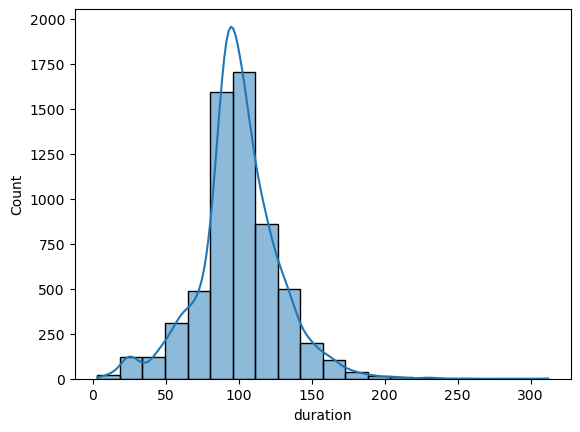

In [4859]:
sns.histplot(
    data = movies,
    x = "duration",
    bins= 20,
    kde = True
)
plt.show()

- Majority Distribution of movies duration is between **90 - 110 mins**

##### Categorical Columns Movies

###### Director

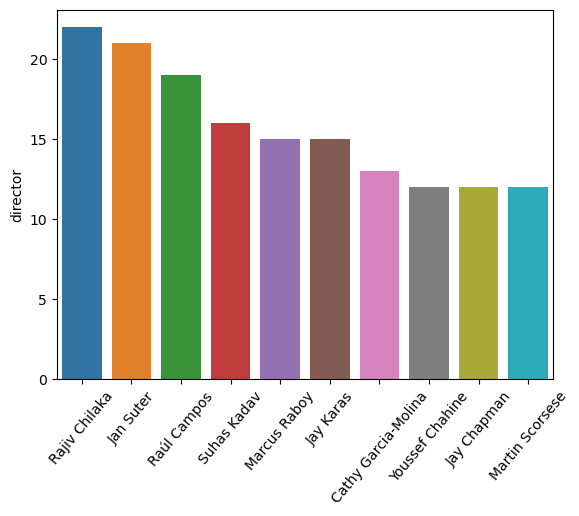

In [4860]:
group = exp_mov.groupby(["show_id","director"]).size().reset_index()["director"]
sns.barplot(
    x = group.value_counts().index[:10],
    y = group.value_counts()[:10]
)
plt.xticks(rotation=50)
plt.show()

- **Rajiv Chilaka,Jan suter,Raul Campos** have most movie titles on netflix

###### Cast

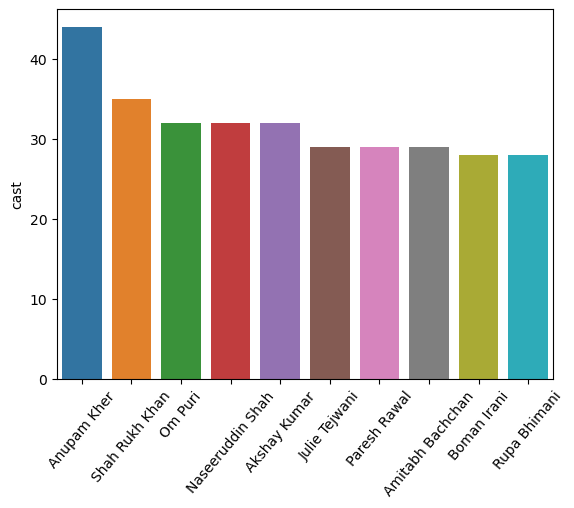

In [4861]:
group = exp_mov.groupby(["show_id","cast"]).size().reset_index()["cast"]
sns.barplot(
    x = group.value_counts().index[:10],
    y = group.value_counts()[:10]
)
plt.xticks(rotation=50)
plt.show()

- **Anupam Kher, Shah Rukh Khan** have most titles on netflix

###### Country

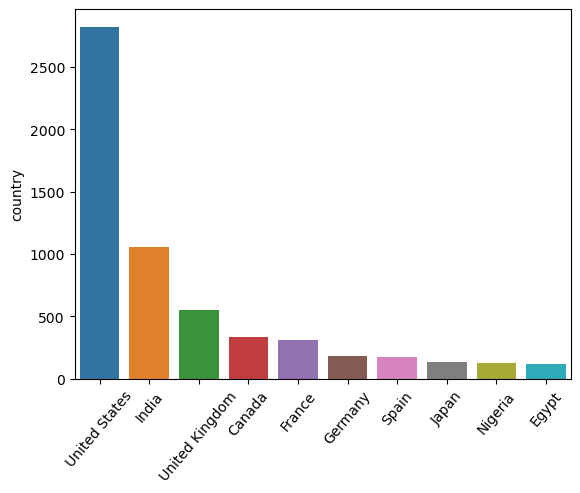

In [4862]:
group = exp_mov.groupby(["show_id","country"]).size().reset_index()["country"]
sns.barplot(
    x = group.value_counts().index[:10],
    y = group.value_counts()[:10]
)
plt.xticks(rotation=50)
plt.show()

- **United States, India, United kingdom** are most common places where content is produced.

###### Release_Year

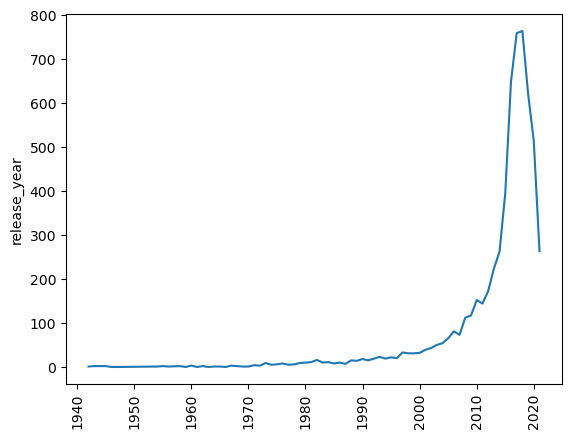

In [4863]:
group = exp_mov.groupby(["show_id","release_year"]).size().reset_index()["release_year"]
sns.lineplot(
    x = group.value_counts().index,
    y = group.value_counts()
)
plt.xticks(rotation=90)
plt.show()

- Most of the the title on netflix are from **2010's**

###### Rating

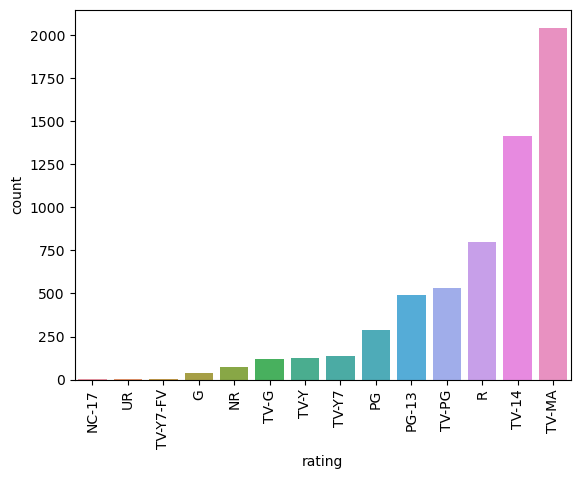

In [4864]:
group = exp_mov.groupby(["show_id","rating"]).size().reset_index()

sns.countplot(
    data = group,
    order = group["rating"].value_counts(ascending=True).index,
    x = "rating"
)
plt.xticks(rotation=90)
plt.show()

- **TV-MA, TV-14, R** have most common rated titles on netflix

###### listed_in

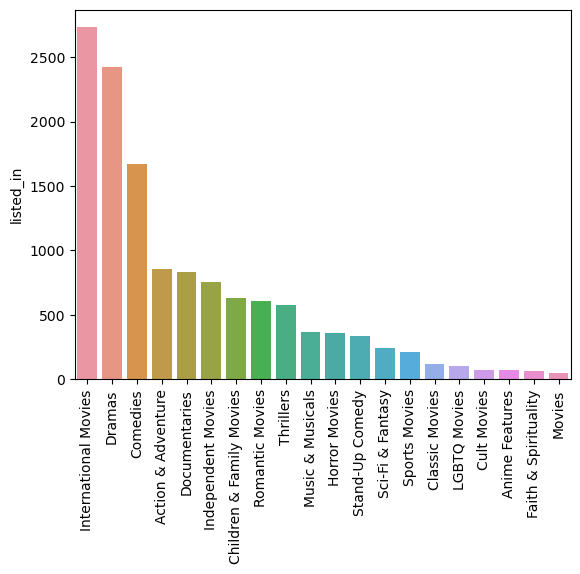

In [4865]:
group = exp_mov.groupby(["show_id","listed_in"]).size().reset_index()["listed_in"]
sns.barplot(
    x = group.value_counts().index,
    y = group.value_counts()
)
plt.xticks(rotation=90)
plt.show()

- Most of the content from the world
- Common genres are **Dramas, Comedies and Action**

##### Categorical Columns TV

###### Director

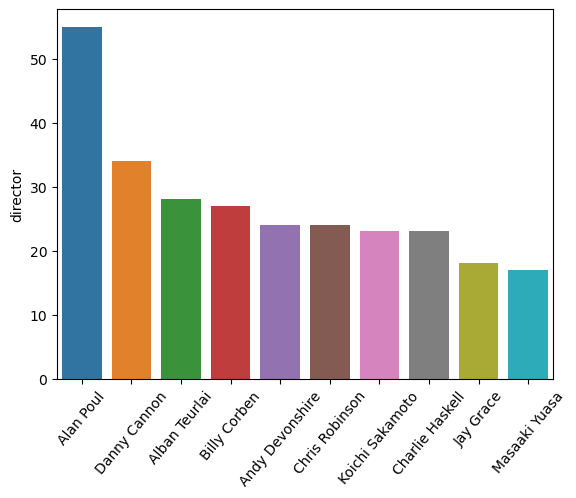

In [4866]:
group = exp_tv.groupby(["show_id","director"]).size().reset_index()["director"]
sns.barplot(
    x = group.value_counts().index[:10],
    y = group.value_counts()[:10]
)
plt.xticks(rotation=50)
plt.show()

- **Alan Poul, Danny Cannon, Aliban Teurlai** have most titles on netflix

###### Cast

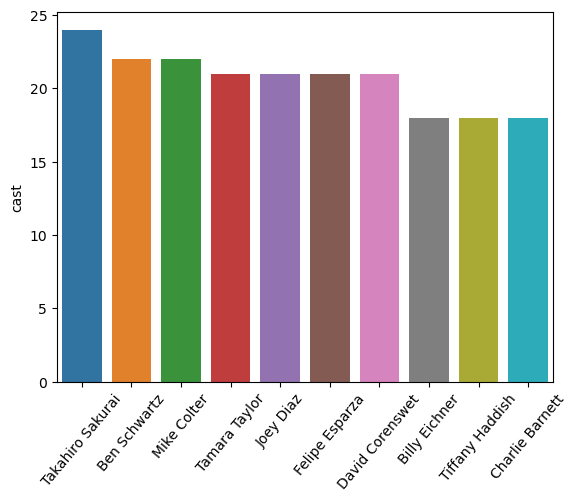

In [4867]:
group = exp_tv.groupby(["show_id","cast"]).size().reset_index()["cast"]
sns.barplot(
    x = group.value_counts().index[:10],
    y = group.value_counts()[:10]
)
plt.xticks(rotation=50)
plt.show()

- **Takahiro Skurai, Ben Schwartz, Mike Colter** have most titles on netflix

###### Country

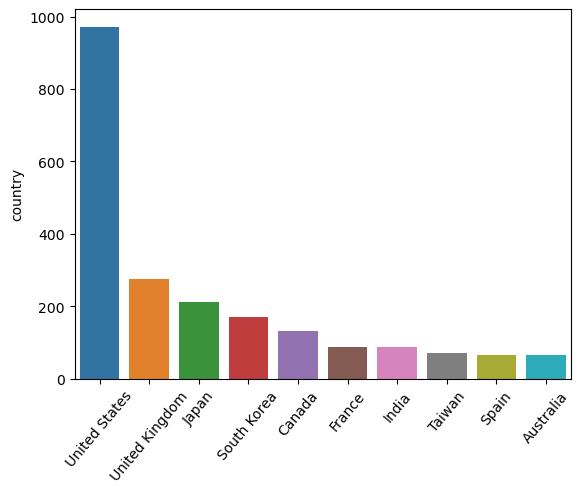

In [4868]:
group = exp_tv.groupby(["show_id","country"]).size().reset_index()["country"]
sns.barplot(
    x = group.value_counts().index[:10],
    y = group.value_counts()[:10]
)
plt.xticks(rotation=50)
plt.show()

- Most of the content is from  **United States**

###### Release_Year

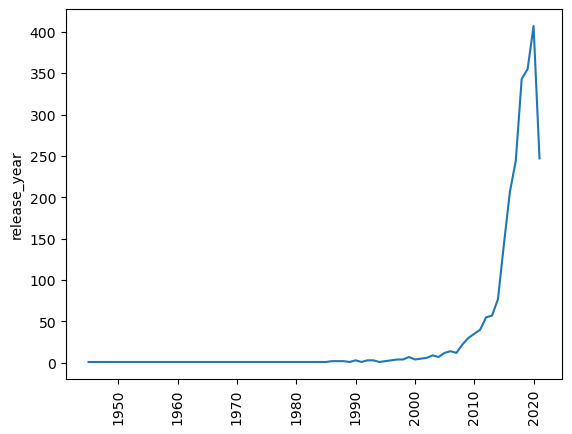

In [4869]:
group = exp_tv.groupby(["show_id","release_year"]).size().reset_index()["release_year"]
sns.lineplot(
    x = group.value_counts().index,
    y = group.value_counts()
)
plt.xticks(rotation=90)
plt.show()

- Most of the content is released around 2015

###### Duration

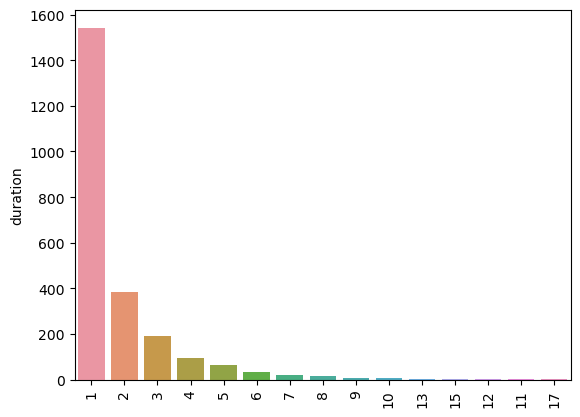

In [4870]:
group = exp_tv.groupby(["show_id","duration"]).size().reset_index()["duration"]
sns.barplot(
    x = group.value_counts().index,
    y = group.value_counts()
)
plt.xticks(rotation=90)
plt.show()

- Majority od shows has only **1 season** 

###### Rating

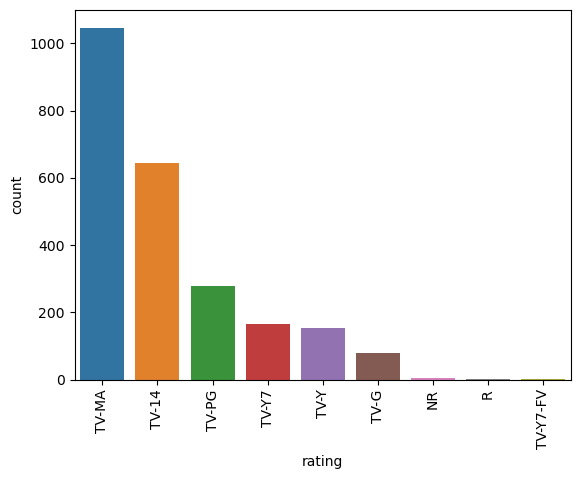

In [4871]:
group = exp_tv.groupby(["show_id","rating"]).size().reset_index()

sns.countplot(
    data = group,
    order = group["rating"].value_counts(ascending=False).index,
    x = "rating"
)
plt.xticks(rotation=90)
plt.show()

- **TV-MA, TV-14, TV-PG** most common rated tc content on netflix

###### Listed_in

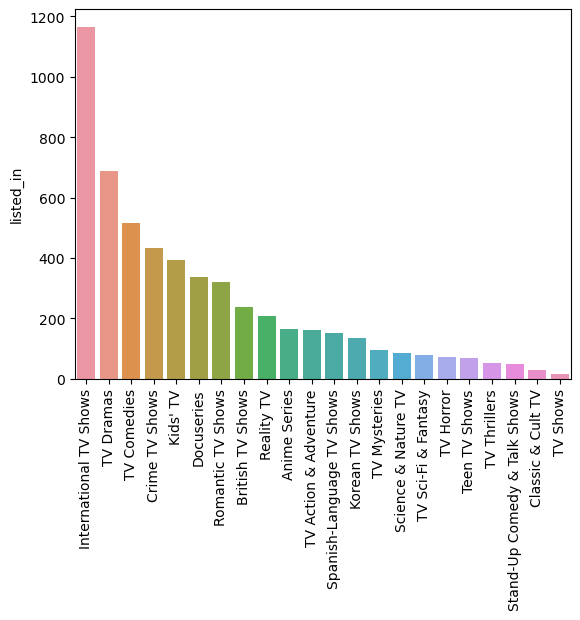

In [4872]:
group = exp_tv.groupby(["show_id","listed_in"]).size().reset_index()["listed_in"]
sns.barplot(
    x = group.value_counts().index,
    y = group.value_counts()
)
plt.xticks(rotation=90)
plt.show()

- Most of the content from the world
- Common genres are **Dramas, Comedies and Crime**

#### 3.5.2 Bivariate / Multivariate Analysis

##### 3.5.2.1. Cast - Country

###### Movies

In [4873]:
top_n_country_mov = exp_mov.groupby(["show_id","country"]).size().reset_index()["country"].value_counts()[:5]
top_n_country_mov

United States     2823
India             1058
United Kingdom     548
Canada             332
France             307
Name: country, dtype: int64

In [4874]:
cast_country_mov = exp_mov[exp_mov["country"]!=""].groupby(["show_id","country","cast"]).size().reset_index()
cast_country_mov = cast_country_mov.groupby(["country","cast"]).size().reset_index().rename({0:"total_listed_movies"},axis=1)
cast_country_mov = cast_country_mov.groupby("country").apply(lambda x: x.nlargest(3,"total_listed_movies")).reset_index(drop=True)

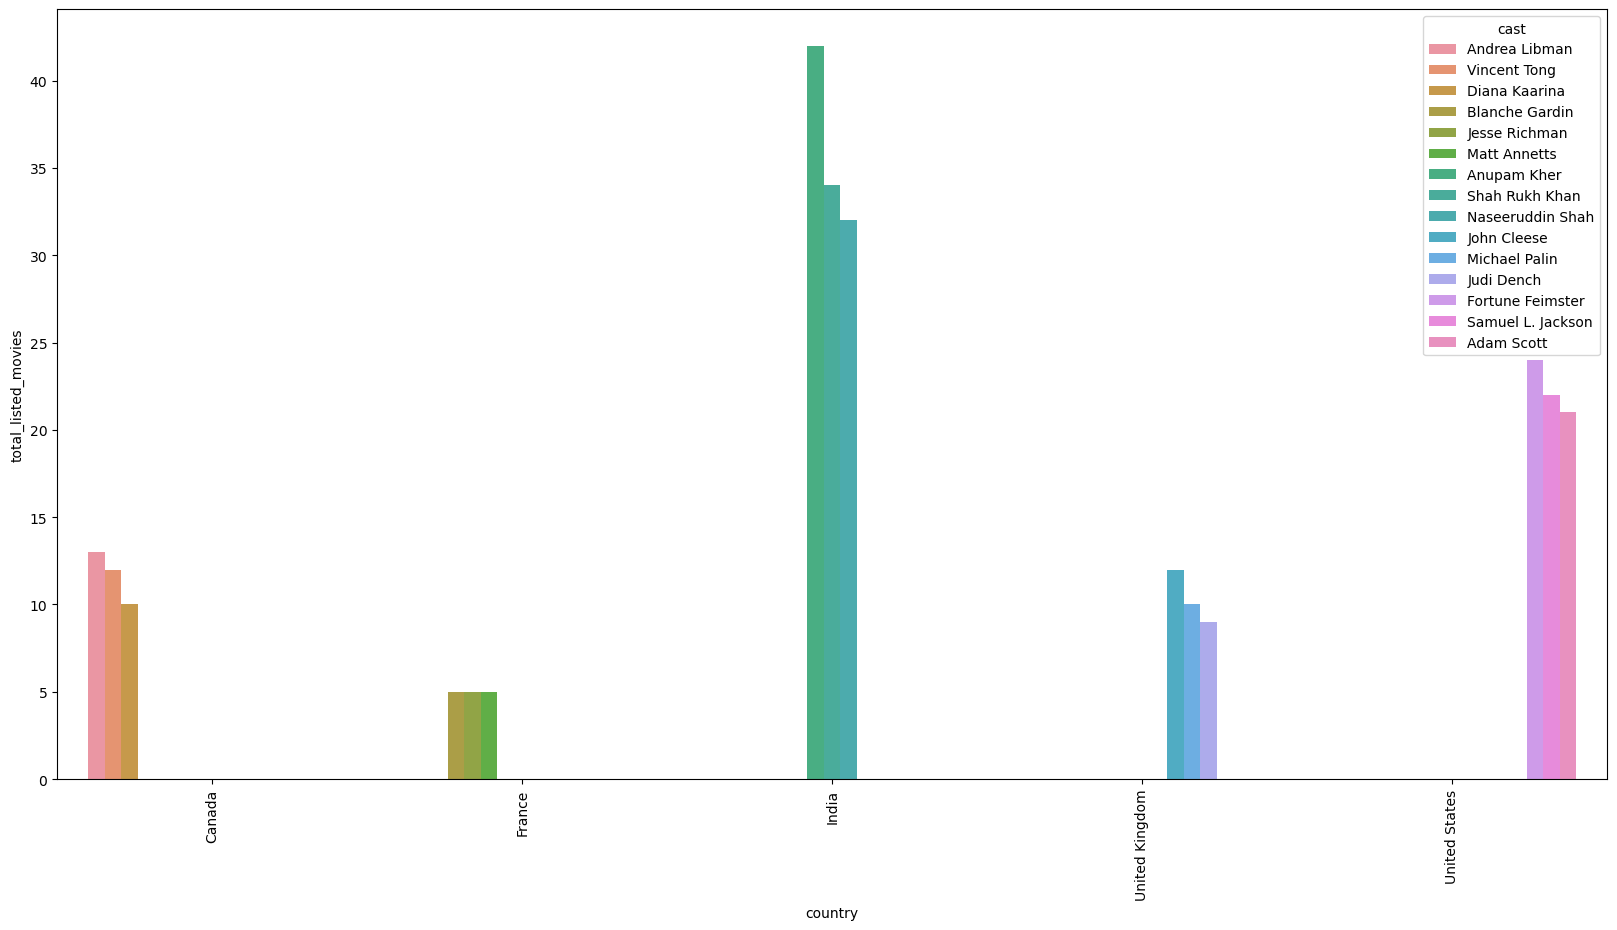

In [4875]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = cast_country_mov.loc[(cast_country["country"].isin(top_n_country_mov.index[:5]))],
    x= "country",
    y="total_listed_movies",
    hue="cast"
)
plt.xticks(rotation=90)
plt.show()

- Most common cast are:-
    - Anupam Kher from India
    - John Cleese from United Kingdom
    - Fortune Feimster from United States 


###### TV

In [4876]:
top_n_country_tv = exp_tv.groupby(["show_id","country"]).size().reset_index()["country"].value_counts()[:5]
top_n_country_tv

United States     972
United Kingdom    275
Japan             211
South Korea       170
Canada            131
Name: country, dtype: int64

In [4877]:
cast_country_tv = exp_tv[exp_tv["country"]!=""].groupby(["show_id","country","cast"]).size().reset_index()
cast_country_tv = cast_country_tv.groupby(["country","cast"]).size().reset_index().rename({0:"total_listed_movies"},axis=1)
cast_country_tv = cast_country_tv.groupby("country").apply(lambda x: x.nlargest(3,"total_listed_movies")).reset_index(drop=True)

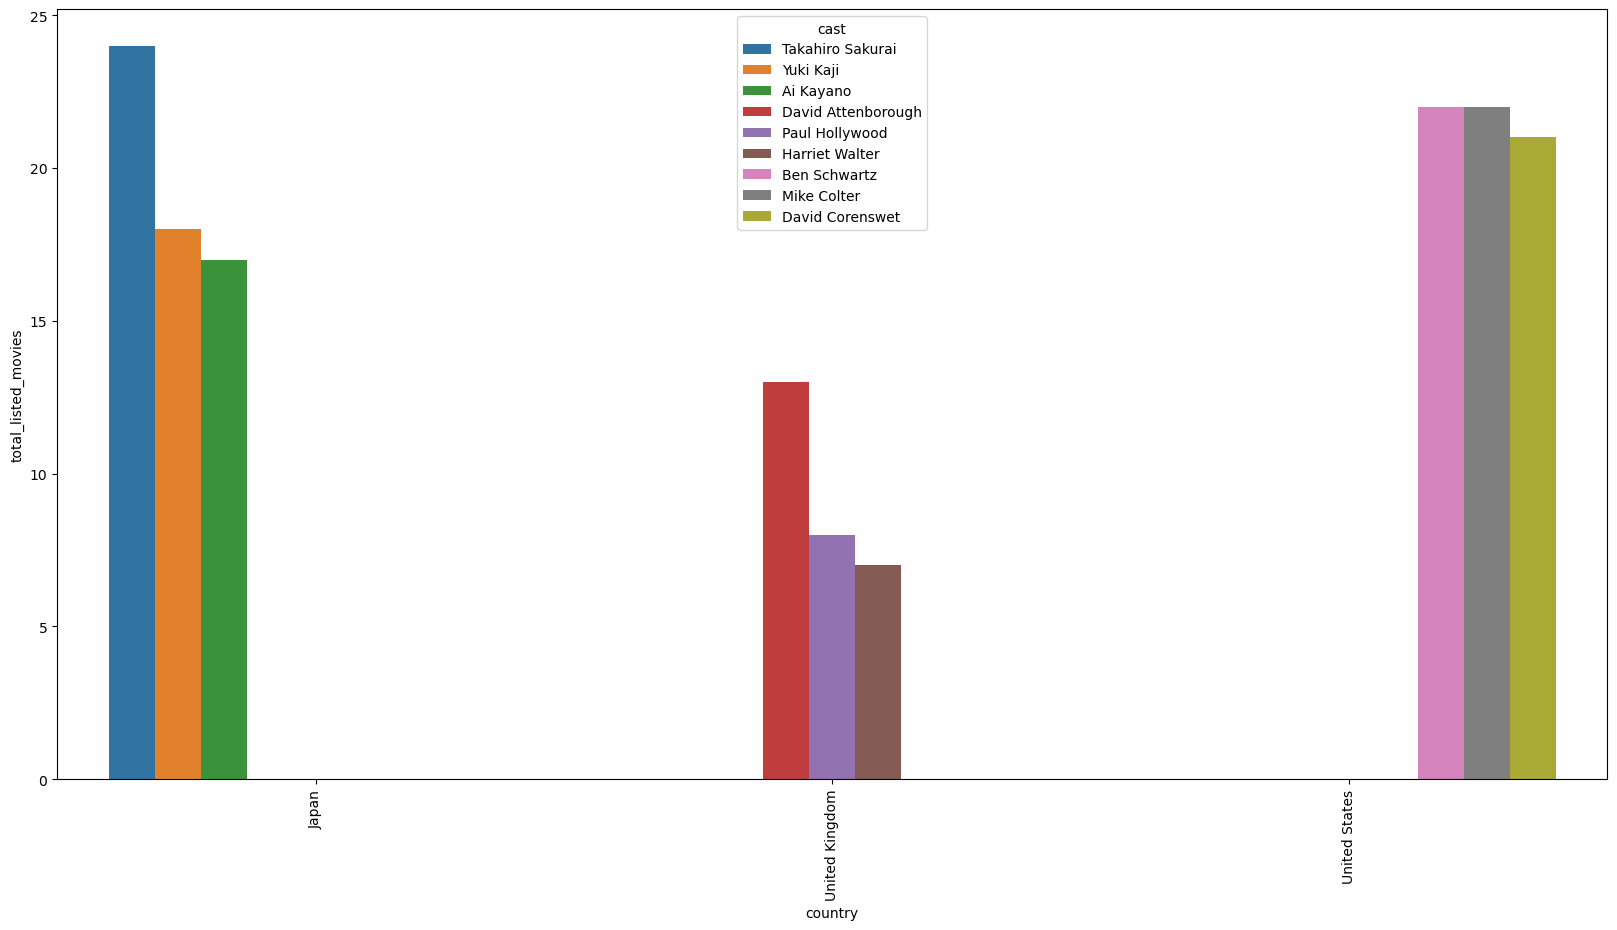

In [4878]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = cast_country_tv.loc[(cast_country_tv["country"].isin(top_n_country_tv.index[:3]))],
    x= "country",
    y="total_listed_movies",
    hue="cast"
)
plt.xticks(rotation=90)
plt.show()

- Most common cast are:-
    - Takahiro Sakurai from Japan
    - David Attenborough from United Kingdom
    - Ben Schwartz, Mike Colter from United States 

##### 3.5.2.2 Country - Genre

###### Movies

In [4879]:
top_n_genre_mov = exp_mov.groupby(["show_id","listed_in"]).size().reset_index()["listed_in"].value_counts()[:5]
top_n_genre_mov

International Movies    2730
Dramas                  2422
Comedies                1673
Action & Adventure       859
Documentaries            835
Name: listed_in, dtype: int64

In [4880]:
country_genre_mov = exp_mov[exp_mov["country"]!=""].groupby(["show_id","country","listed_in"]).size().reset_index()
country_genre_mov = country_genre_mov.groupby(["country","listed_in"]).size().reset_index().rename({0:"total_listed_movies"},axis=1)

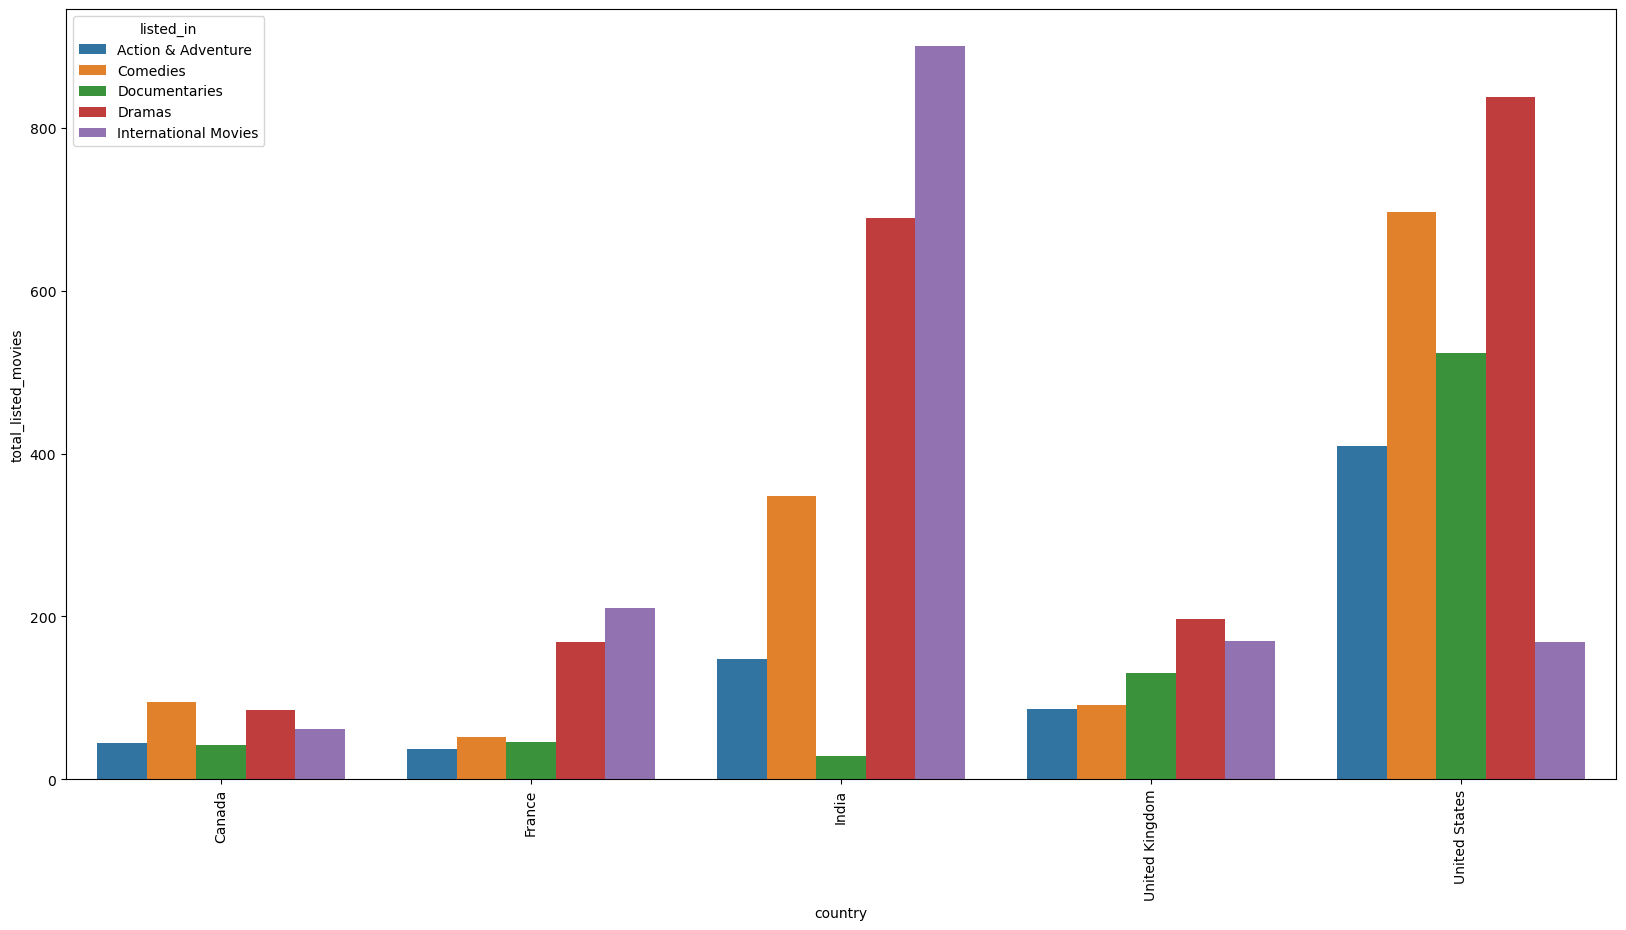

In [4881]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = country_genre_mov.loc[(country_genre_mov["listed_in"].isin(top_n_genre_mov.index)) & (country_genre_mov["country"].isin(top_n_country_mov.index))],
    x= "country",
    y="total_listed_movies",
    hue="listed_in"
)
plt.xticks(rotation=90)
plt.show()

- Most Common Genre:-
    - Comedies and Drama in Canada
    - International Movies & Dramas in France
    - International Movies & Dramas in India, Documentaries least produced in India
    - International Movies & Dramas in United Kingdom
    - Dramas and Comedies in United States

###### TV

In [4882]:
top_n_genre_tv = exp_tv.groupby(["show_id","listed_in"]).size().reset_index()["listed_in"].value_counts()[:5]
top_n_genre_tv

International TV Shows    1166
TV Dramas                  688
TV Comedies                517
Crime TV Shows             434
Kids' TV                   394
Name: listed_in, dtype: int64

In [4883]:
country_genre_tv = exp_tv[exp_tv["country"]!=""].groupby(["show_id","country","listed_in"]).size().reset_index()
country_genre_tv = country_genre_tv.groupby(["country","listed_in"]).size().reset_index().rename({0:"total_listed_movies"},axis=1)

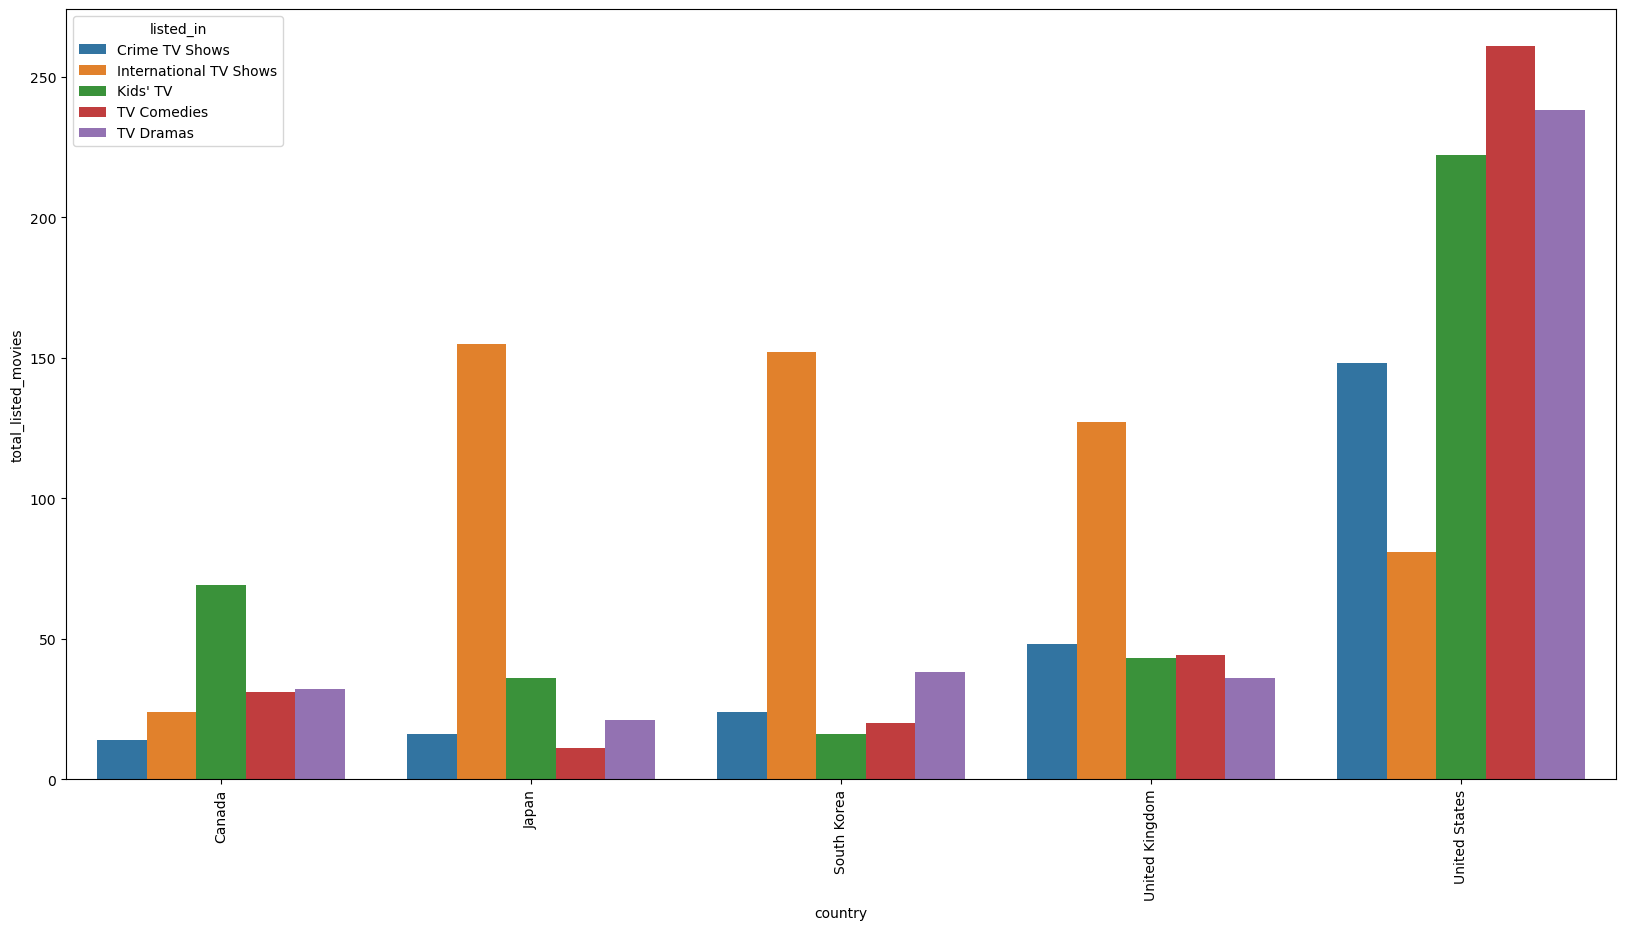

In [4884]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = country_genre_tv.loc[(country_genre_tv["listed_in"].isin(top_n_genre_tv.index)) & (country_genre_tv["country"].isin(top_n_country_tv.index))],
    x= "country",
    y="total_listed_movies",
    hue="listed_in"
)
plt.xticks(rotation=90)
plt.show()

- Most Common Genre:-
    - Kids TV in Canada
    - International TV Shows in Japan, Comedies least produced in Japan
    - International TV Shows in South Korea, Kid's TV, Comedies least produced in South Korea
    - International TV Shows in  in United Kingdom
    - Dramas and Comedies in United States

##### 3.5.2.3 Country - Rating

###### Movies

In [4885]:
country_rating_mov = exp_mov[exp_mov["country"]!=""].groupby(["show_id","country","rating"]).size().reset_index()
country_rating_mov = country_rating_mov.groupby(["country","rating"]).size().reset_index().rename({0:"total_listed_movies"},axis=1)
country_rating_mov.head()

,country,rating,total_listed_movies
0,Afghanistan,TV-MA,1
1,Albania,TV-MA,1
2,Algeria,TV-14,1
3,Algeria,TV-MA,2
4,Angola,TV-MA,1


In [4886]:
top_n_rating_mov = exp_mov.groupby(["show_id","rating"]).size().reset_index()["rating"].value_counts()[:5]
top_n_rating_mov

TV-MA    2043
TV-14    1416
R         796
TV-PG     532
PG-13     489
Name: rating, dtype: int64

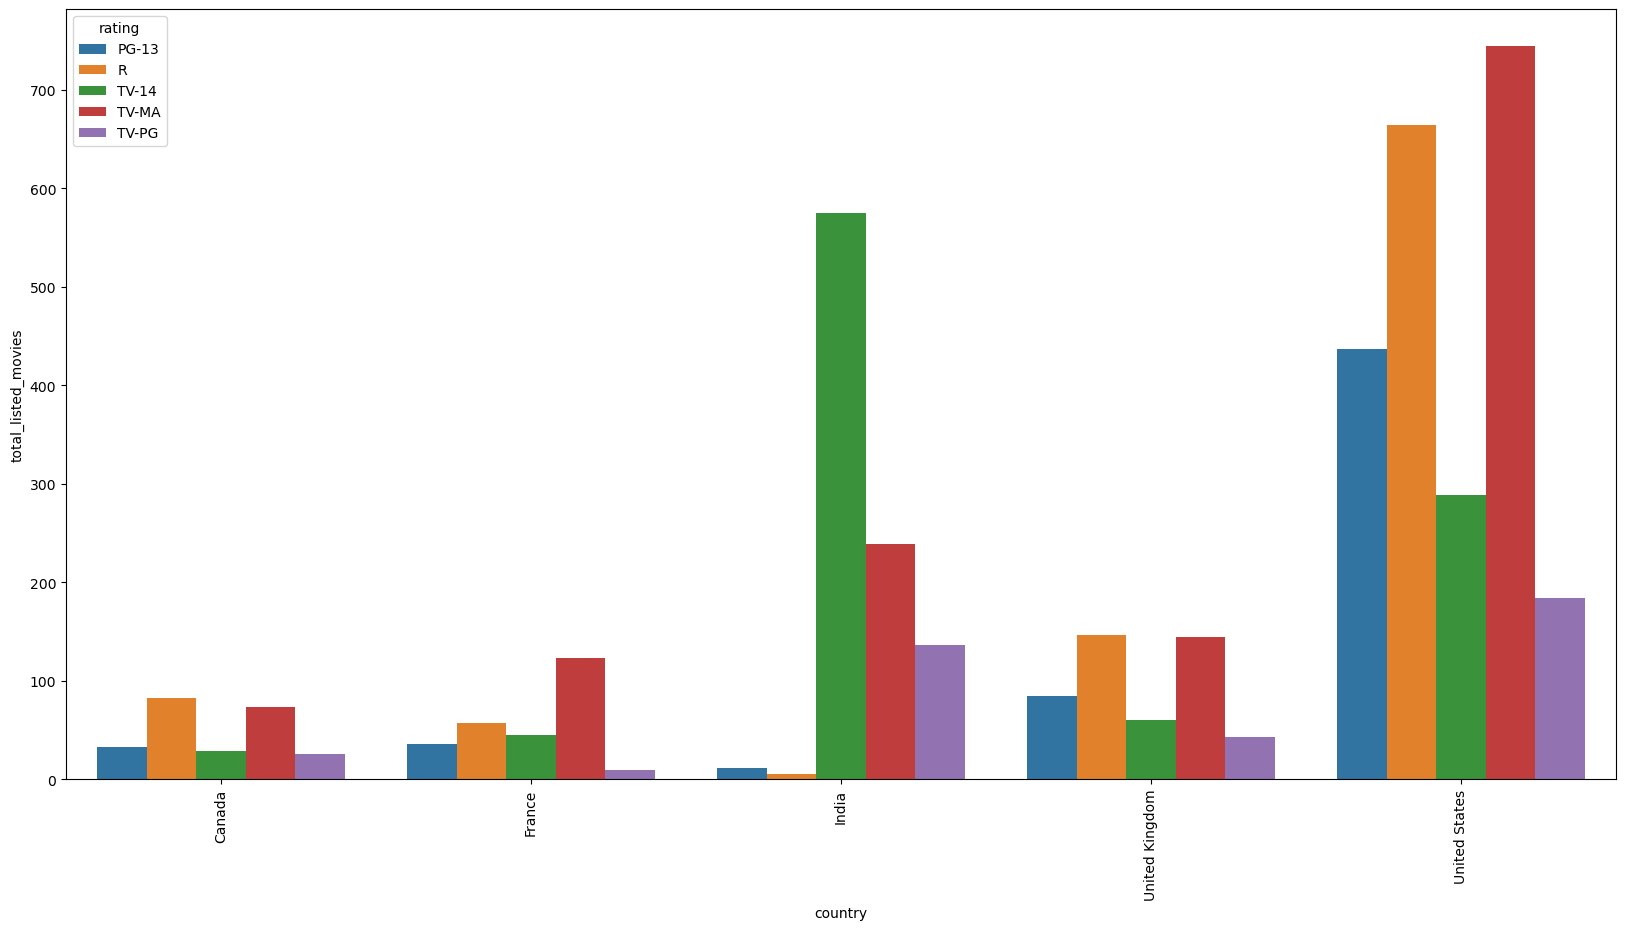

In [4887]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = country_rating_mov.loc[(country_rating_mov["rating"].isin(top_n_rating_mov.index)) & (country_rating_mov["country"].isin(top_n_country_mov.index))],
    x= "country",
    y="total_listed_movies",
    hue="rating"
)
plt.xticks(rotation=90)
plt.show()

- Most common rated Content:-
    - R in Canada
    - TV-MA in France
    - TV-14 in India
    - TV-MA & R in United Kingdom
    - TV-MA & R in United States

###### TV

In [4888]:
country_rating_tv = exp_tv[exp_tv["country"]!=""].groupby(["show_id","country","rating"]).size().reset_index()
country_rating_tv = country_rating_tv.groupby(["country","rating"]).size().reset_index().rename({0:"total_listed_movies"},axis=1)
country_rating_tv.head()

,country,rating,total_listed_movies
0,Angola,TV-14,1
1,Argentina,TV-14,2
2,Argentina,TV-MA,15
3,Argentina,TV-PG,1
4,Argentina,TV-Y,2


In [4889]:
top_n_rating_tv = exp_tv.groupby(["show_id","rating"]).size().reset_index()["rating"].value_counts()[:5]
top_n_rating_tv

TV-MA    1047
TV-14     645
TV-PG     277
TV-Y7     166
TV-Y      154
Name: rating, dtype: int64

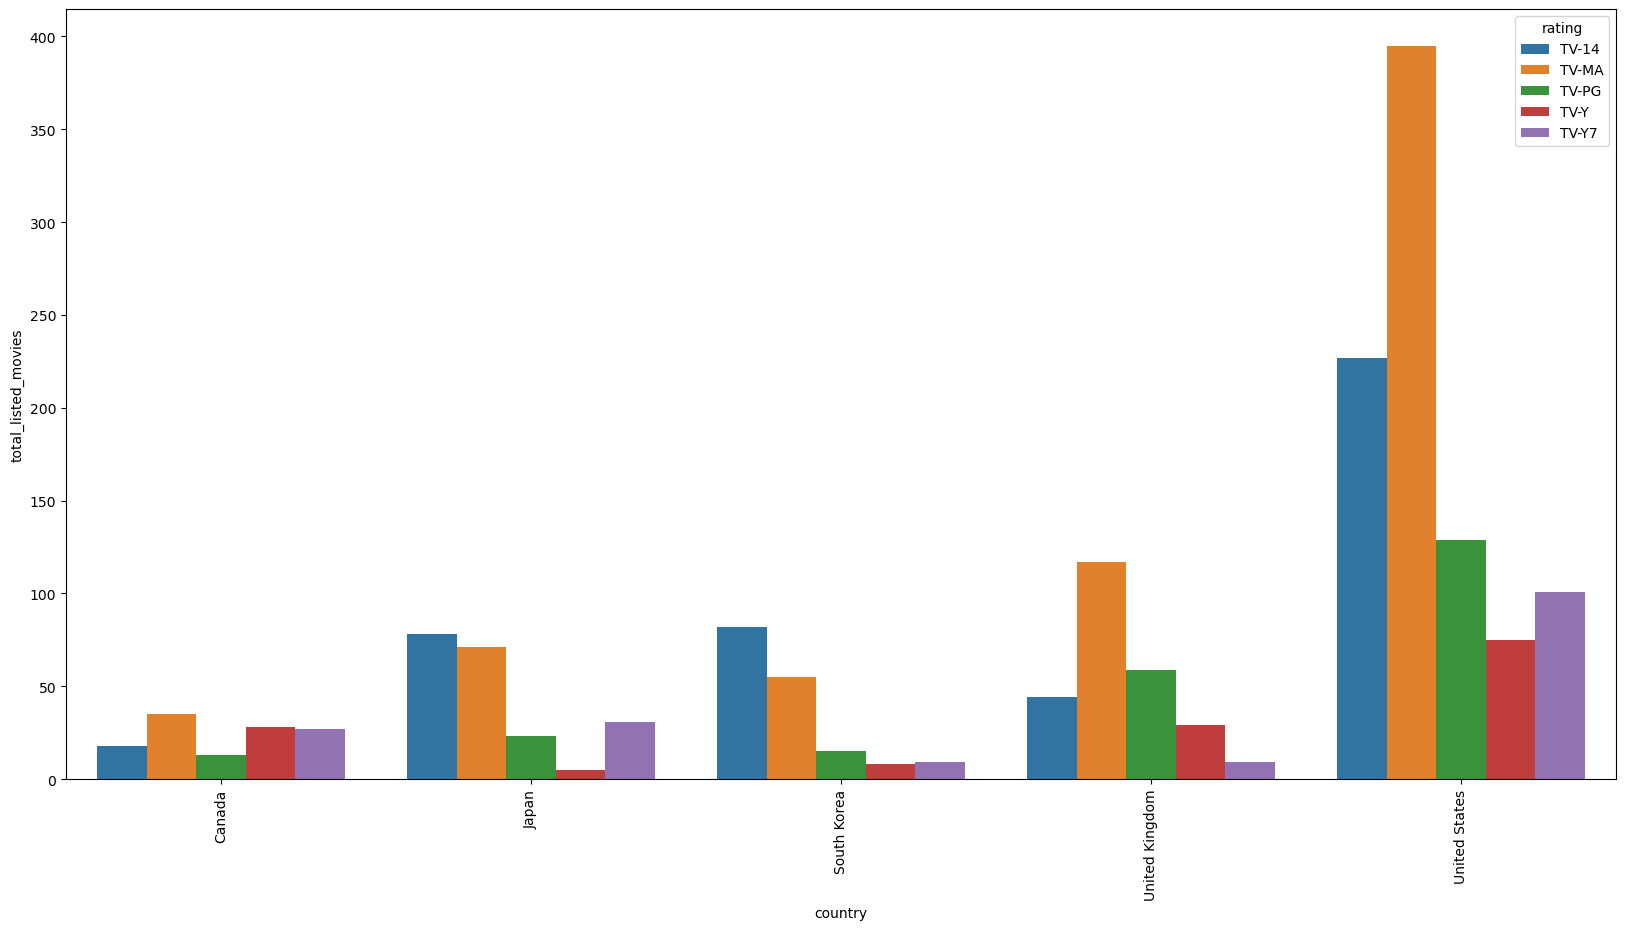

In [4890]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = country_rating_tv.loc[(country_rating_tv["rating"].isin(top_n_rating_tv.index)) & (country_rating_tv["country"].isin(top_n_country_tv.index))],
    x= "country",
    y="total_listed_movies",
    hue="rating"
)
plt.xticks(rotation=90)
plt.show()

- Most common rated Content:-
    - TV-MA in Canada
    - TV-14 in Japan
    - TV-14 in South Korea
    - TV-MA in United Kingdom
    - TV-MA in United States

##### 3.5.2.4 Date_Added - Release_Year

###### Movies

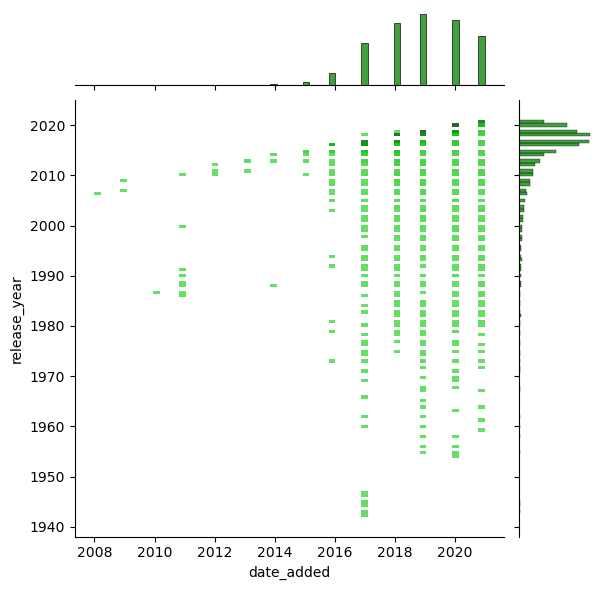

In [4891]:
sns.jointplot(
    x=movies["date_added"].dt.year,
    y=movies["release_year"].astype("int64"),
    kind="hist",
    color="green"
)

- Most of the content added around 2018
- Most of the content on Netflix is released around 2015

###### TV

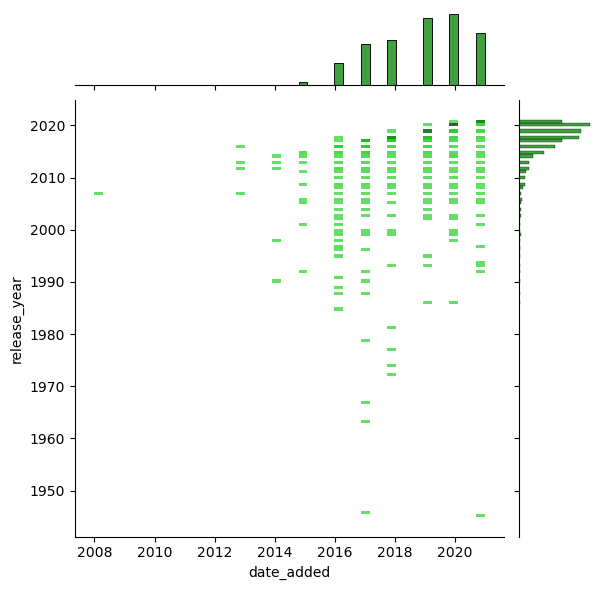

In [4892]:
sns.jointplot(
    x=tv["date_added"].dt.year,
    y=tv["release_year"].astype("int64"),
    kind="hist",
    color="green"
)

- Most of the content added around 2019
- Most of the content on Netflix is released around 2018

##### 3.5.2.5 Country - Duration

###### Movies

In [4893]:
country_duration_genre_mov = exp_mov[exp_mov["country"]!=""].groupby(["show_id","country","listed_in"])["duration"].mean().reset_index().drop("show_id",axis=1)
country_duration_genre_mov = country_duration_genre_mov.groupby(["country","listed_in"]).mean().reset_index()
country_duration_genre_mov.head()

,country,listed_in,duration
0,Afghanistan,Documentaries,84.0
1,Afghanistan,International Movies,84.0
2,Albania,Dramas,105.0
3,Albania,International Movies,105.0
4,Algeria,Classic Movies,131.0


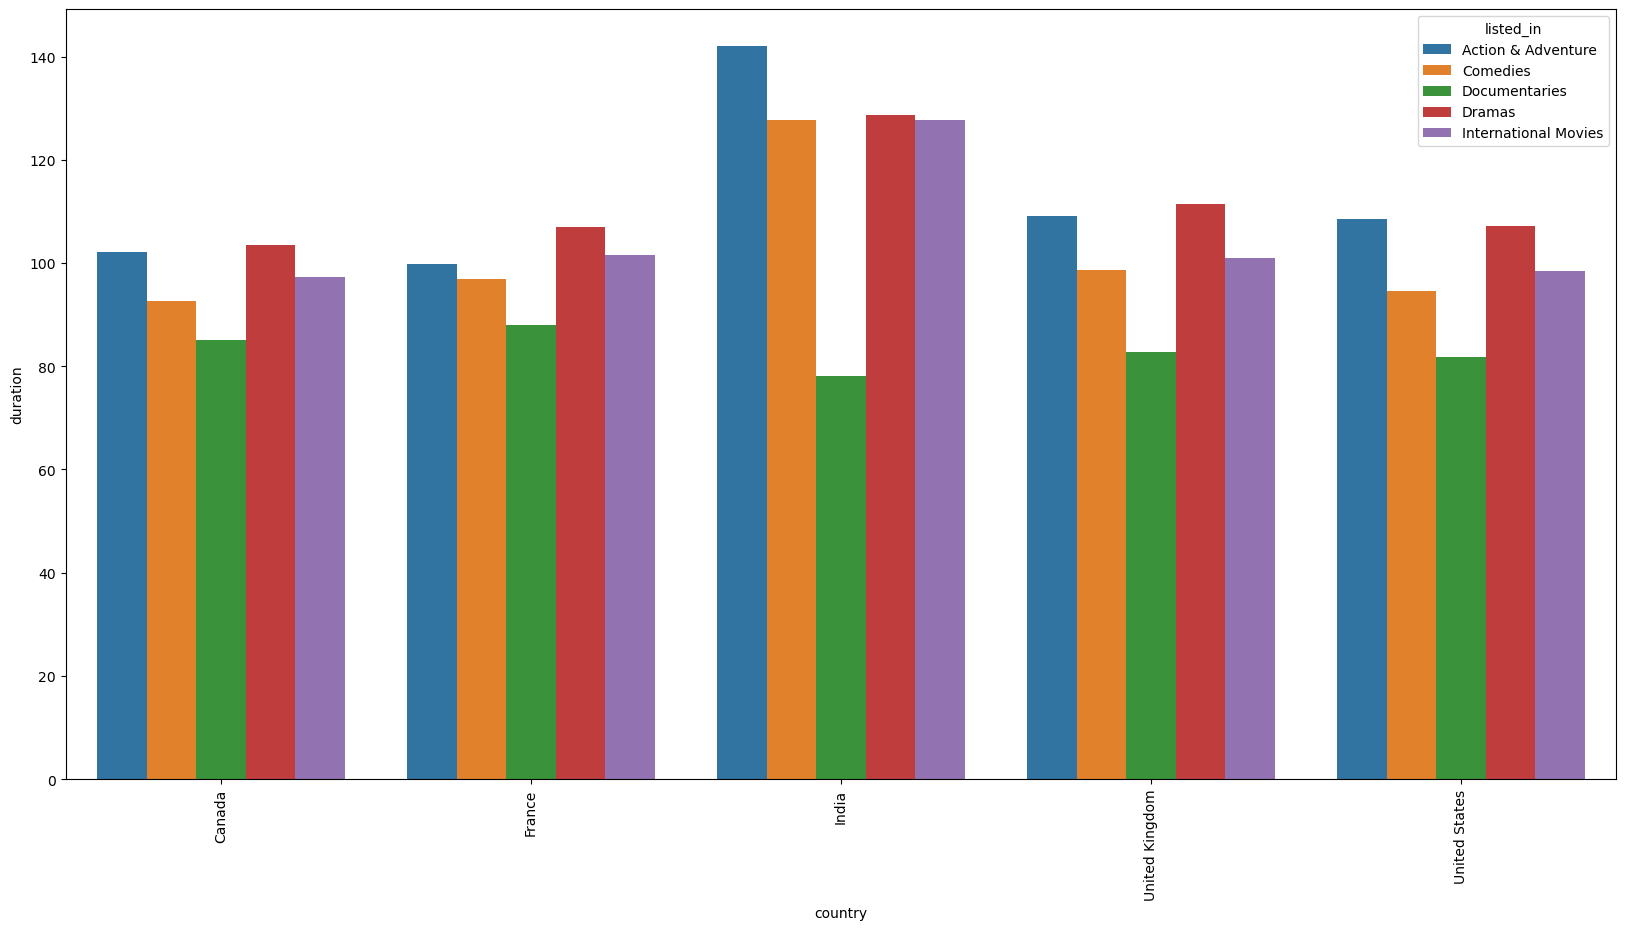

In [4894]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = country_duration_genre_mov.loc[(country_duration_genre_mov["listed_in"].isin(top_n_genre_mov.index)) & (country_duration_genre_mov["country"].isin(top_n_country_mov.index))],
    x= "country",
    y="duration",
    hue="listed_in"
)
plt.xticks(rotation=90)
plt.show()

- Longer duration of content observed in India, while  documentary duration was less than global average
- All the genres have similar pattern in duration

###### TV

In [4895]:
exp_tv_temp = exp_tv.copy()
exp_tv_temp["duration"] = exp_tv_temp["duration"].astype("int64")

country_duration_genre_tv = exp_tv_temp[exp_tv_temp["country"]!=""].groupby(["show_id","country","listed_in"])["duration"].mean().reset_index().drop("show_id",axis=1)
country_duration_genre_tv = country_duration_genre_tv.groupby(["country","listed_in"]).mean().reset_index()
country_duration_genre_tv["duration"] = round(country_duration_genre_tv["duration"] )
country_duration_genre_tv.head()

,country,listed_in,duration
0,Angola,TV Shows,1.0
1,Argentina,Classic & Cult TV,1.0
2,Argentina,Crime TV Shows,1.0
3,Argentina,Docuseries,1.0
4,Argentina,International TV Shows,1.0


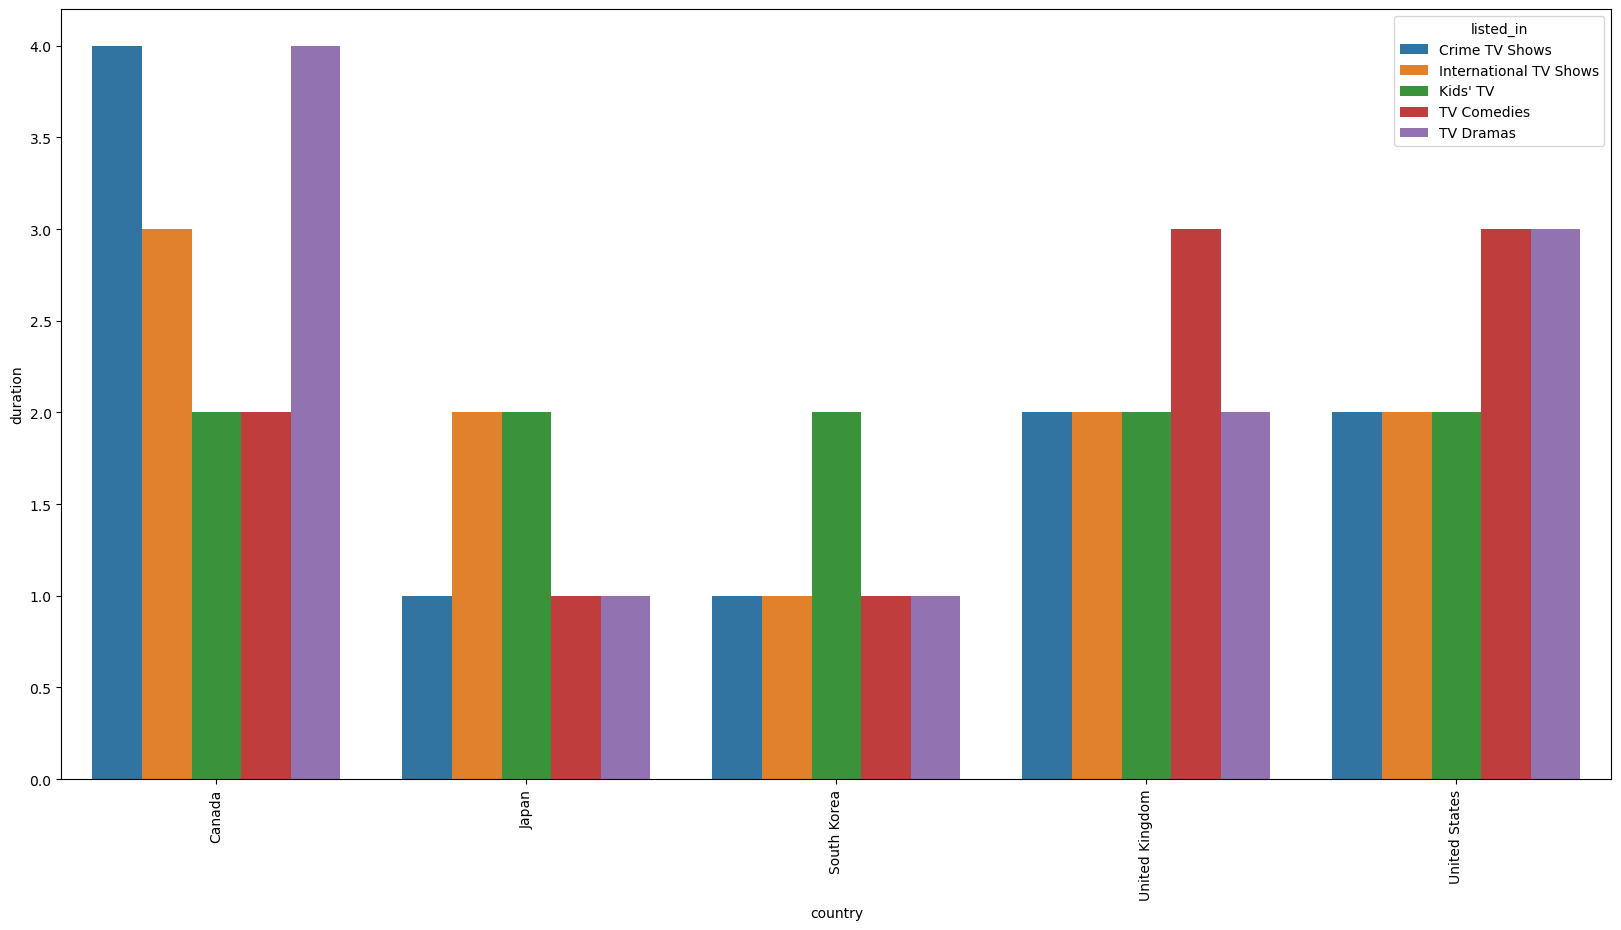

In [4896]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = country_duration_genre_tv.loc[(country_duration_genre_tv["listed_in"].isin(top_n_genre_tv.index)) & (country_duration_genre_tv["country"].isin(top_n_country_tv.index))],
    x= "country",
    y="duration",
    hue="listed_in"
)
plt.xticks(rotation=90)
plt.show()

- Higher Seasons:-
    - Dramas and Crime in Canada
    - International Content & Kids Show in Japan
    - Comedies in United Kingdom
    - Comedies & Dramas in United States

##### 3.5.2.6 Franchise

###### Movies

In [4897]:
exp_mov_temp = exp_mov.copy()

exp_mov_temp["franchise"] = np.where(
    (~exp_mov_temp["title"].str.lower().str.split().str[0].isin(["the","a","an","my"])) & (~exp_mov_temp["title"].str.lower().str.split().str[1].isin(["1","2","3","4","5","6","7","8","9","0"])),
    exp_mov_temp["title"].str.split().str[0:2].str.join(" "),
    exp_mov_temp["title"].str.split().str[0:3].str.join(" ")
)

exp_mov_temp["franchise"] = np.where(
    exp_mov_temp["title"].str.lower().str.split().str[1].isin(["1","2","3","4","5","6","7","8","9","0"]),
    exp_mov_temp["title"].str.split().str[0],
    exp_mov_temp["franchise"]
)

exp_mov_temp["franchise"] = np.where(
    exp_mov_temp["title"].str.lower().str.split().str[1].isin(["and","&","or","in","to","at","into"]),
    exp_mov_temp["title"].str.split().str[0:3].str.join(" "),
    exp_mov_temp["franchise"]
)


exp_mov_temp["franchise"] = exp_mov_temp["franchise"].str.replace(":","")
exp_mov_temp["franchise"] = exp_mov_temp["franchise"].str.replace("-","")

In [4898]:
country_franchise_mov = exp_mov_temp[exp_mov_temp["country"]!=""].groupby(["show_id","country","franchise"]).size().reset_index().drop("show_id",axis=1)
country_franchise_mov = country_franchise_mov.groupby(["country","franchise"]).size().reset_index()
country_franchise_mov = country_franchise_mov.groupby(["country"]).apply(lambda x: x.nlargest(3,0)).reset_index(drop=True).rename({0:"top_listed_movies"},axis=1)
country_franchise_mov.head()

,country,franchise,top_listed_movies
0,Afghanistan,The Land of,1
1,Albania,Forgive Us,1
2,Algeria,Alexandria ...,1
3,Algeria,DNA,1
4,Algeria,Eyes of,1


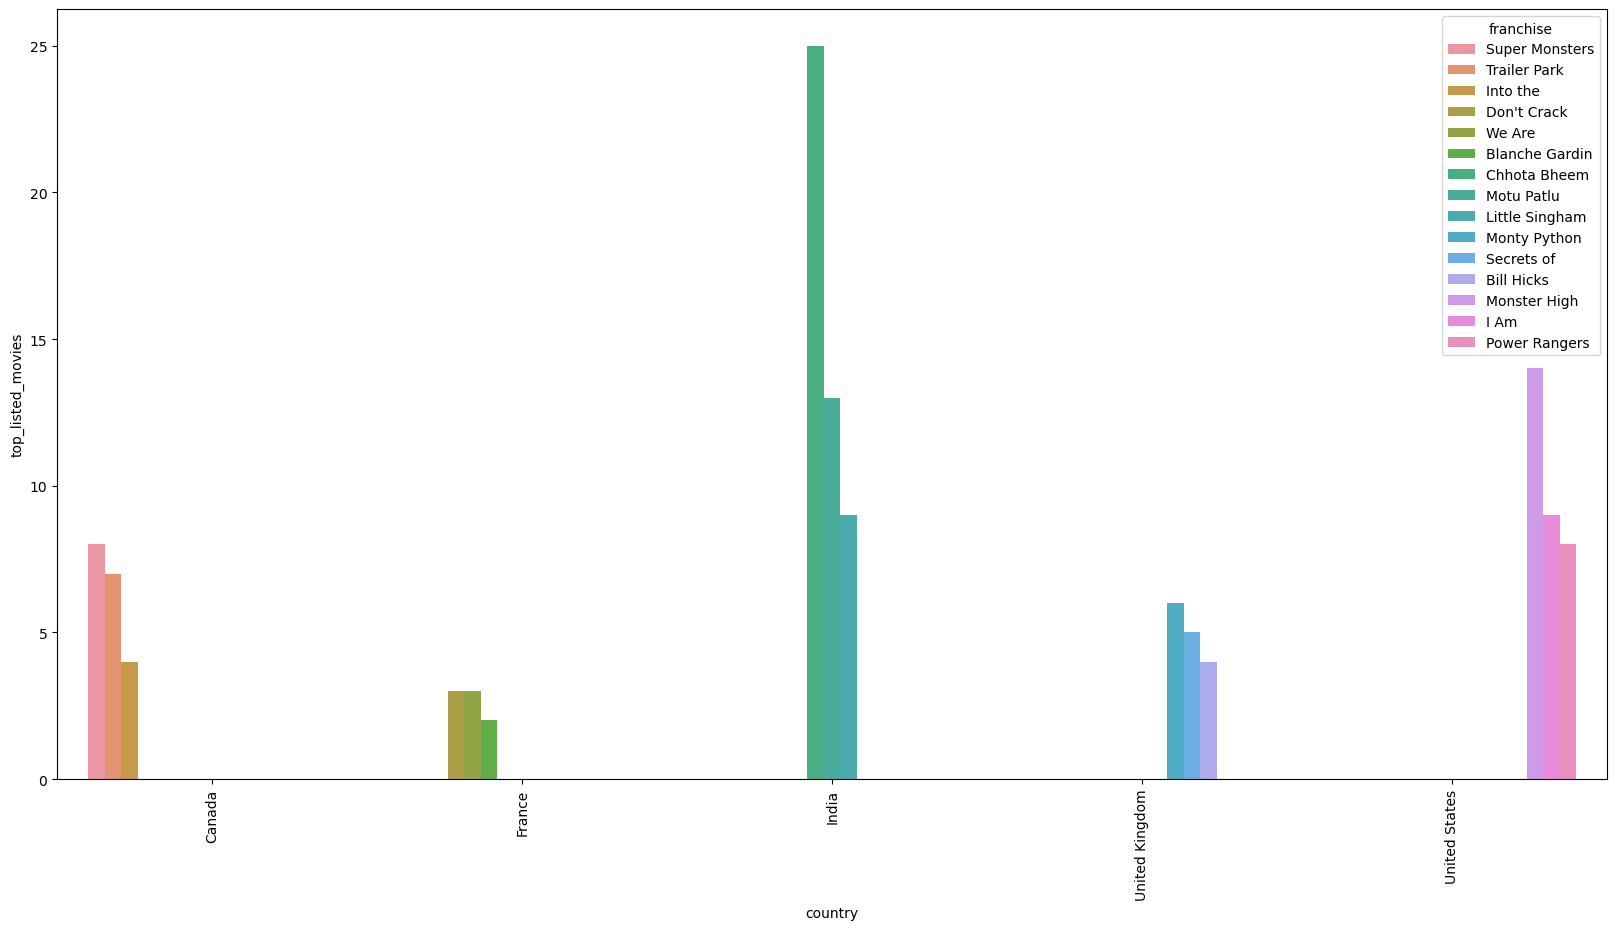

In [4899]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = country_franchise_mov.loc[(country_franchise_mov["country"].isin(top_n_country_mov[:5].index))],
    x= "country",
    y="top_listed_movies",
    hue="franchise"
)
plt.xticks(rotation=90)
plt.show()

- Famous Franchise:-
    - Super Monsters in Canada
    - Don't Crack in France
    - Chhota Bheem in India
    - Monty Python in United Kingdom
    - Monster high in United States

###### TV

In [4900]:
exp_tv_temp = exp_tv.copy()

exp_tv_temp["franchise"] = np.where(
    (~exp_tv_temp["title"].str.lower().str.split().str[0].isin(["the","a","an","my"])) & (~exp_tv_temp["title"].str.lower().str.split().str[1].isin(["1","2","3","4","5","6","7","8","9","0"])),
    exp_tv_temp["title"].str.split().str[0:2].str.join(" "),
    exp_tv_temp["title"].str.split().str[0:3].str.join(" ")
)

exp_tv_temp["franchise"] = np.where(
    exp_tv_temp["title"].str.lower().str.split().str[1].isin(["1","2","3","4","5","6","7","8","9","0"]),
    exp_tv_temp["title"].str.split().str[0],
    exp_tv_temp["franchise"]
)

exp_tv_temp["franchise"] = np.where(
    exp_tv_temp["title"].str.lower().str.split().str[1].isin(["and","&","or","in","to","at","into"]),
    exp_tv_temp["title"].str.split().str[0:3].str.join(" "),
    exp_tv_temp["franchise"]
)


exp_tv_temp["franchise"] = exp_tv_temp["franchise"].str.replace(":","")
exp_tv_temp["franchise"] = exp_tv_temp["franchise"].str.replace("-","")

In [4901]:
country_franchise_tv = exp_tv_temp[exp_tv_temp["country"]!=""].groupby(["show_id","country","franchise"]).size().reset_index().drop("show_id",axis=1)
country_franchise_tv = country_franchise_tv.groupby(["country","franchise"]).size().reset_index()
country_franchise_tv = country_franchise_tv.groupby(["country"]).apply(lambda x: x.nlargest(3,0)).reset_index(drop=True).rename({0:"top_listed_movies"},axis=1)
country_franchise_tv.head()

,country,franchise,top_listed_movies
0,Angola,HQ Barbers,1
1,Argentina,Almost Happy,1
2,Argentina,Apache The,1
3,Argentina,Carmel Who,1
4,Australia,72 Dangerous,3


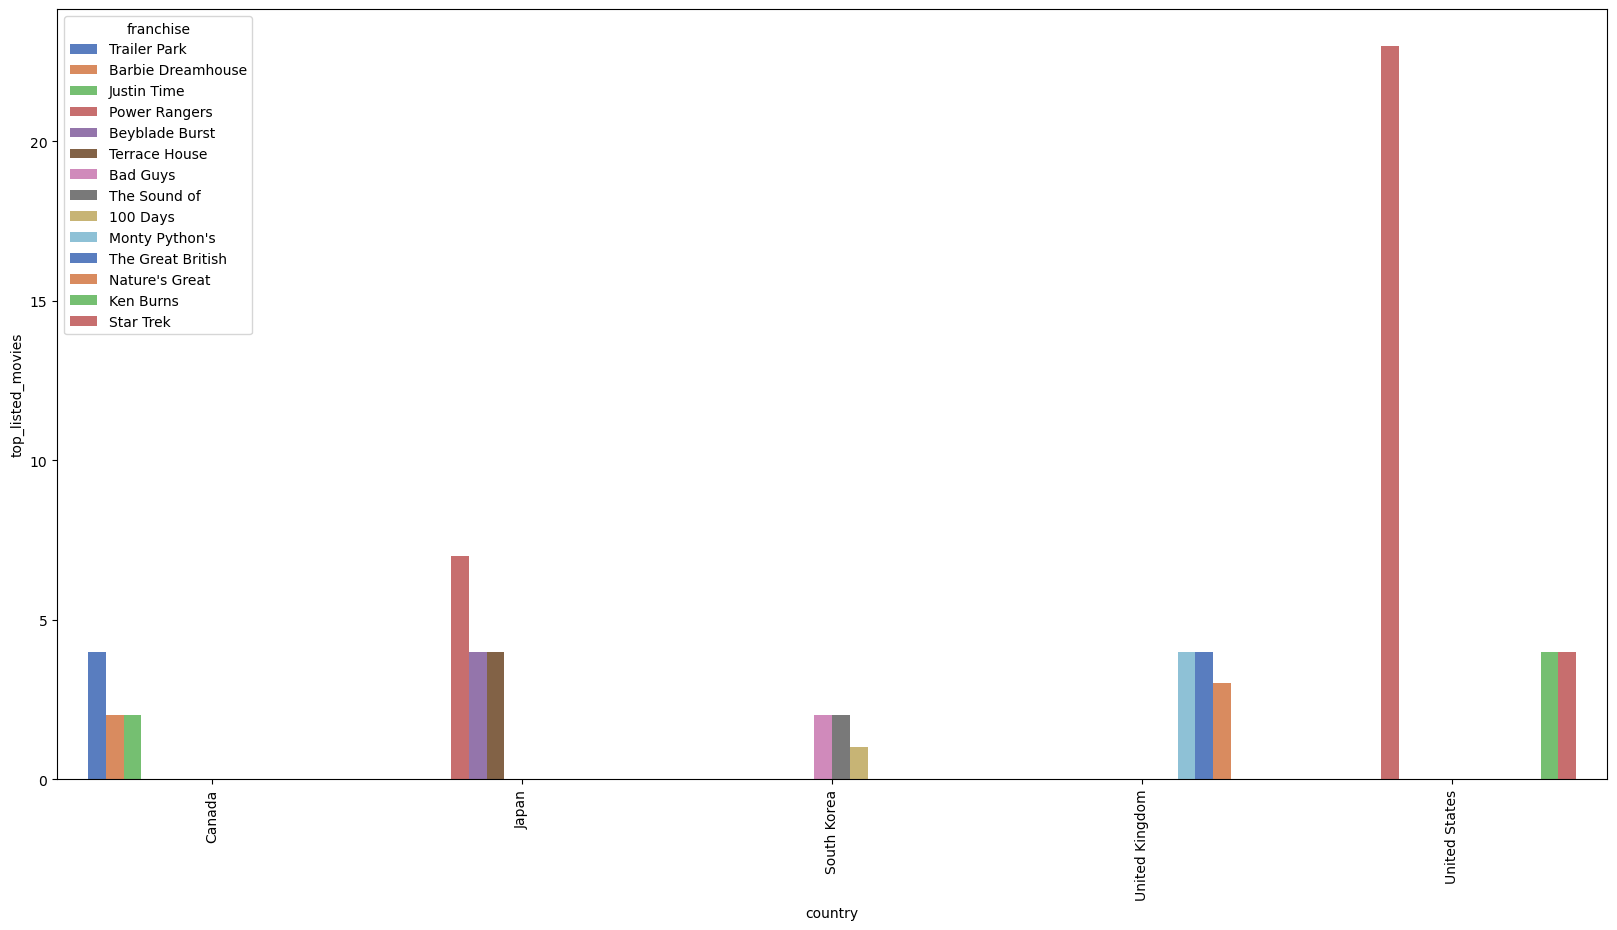

In [4902]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = country_franchise_tv.loc[(country_franchise_tv["country"].isin(top_n_country_tv[:5].index))],
    x= "country",
    y="top_listed_movies",
    hue="franchise",
    palette = "muted"
)
plt.xticks(rotation=90)
plt.show()

- Famous Franchise:-
    - Trailer Park in Canada
    - Power Rangers in Japan
    - Bad Guys in South Korea
    - Monty Python in United Kingdom
    - Power Rangers in United States

##### 3.5.2.7 Director - Country

###### Movies

In [4903]:
director_country_mov = exp_mov[(exp_mov["country"]!="")].dropna().groupby(["show_id","country","director"]).size().reset_index().drop("show_id",axis=1)
director_country_mov = director_country_mov.groupby(["country","director"]).size().reset_index()
director_country_mov = director_country_mov.groupby("country").apply(lambda x: x.nlargest(5,0)).reset_index(drop=True).rename({0:"top_listed_movies"},axis=1)
director_country_mov.head()

,country,director,top_listed_movies
0,Afghanistan,Pieter-Jan De Pue,1
1,Albania,Antonio Morabito,1
2,Algeria,Maïwenn,1
3,Algeria,Najwa Najjar,1
4,Algeria,Youssef Chahine,1


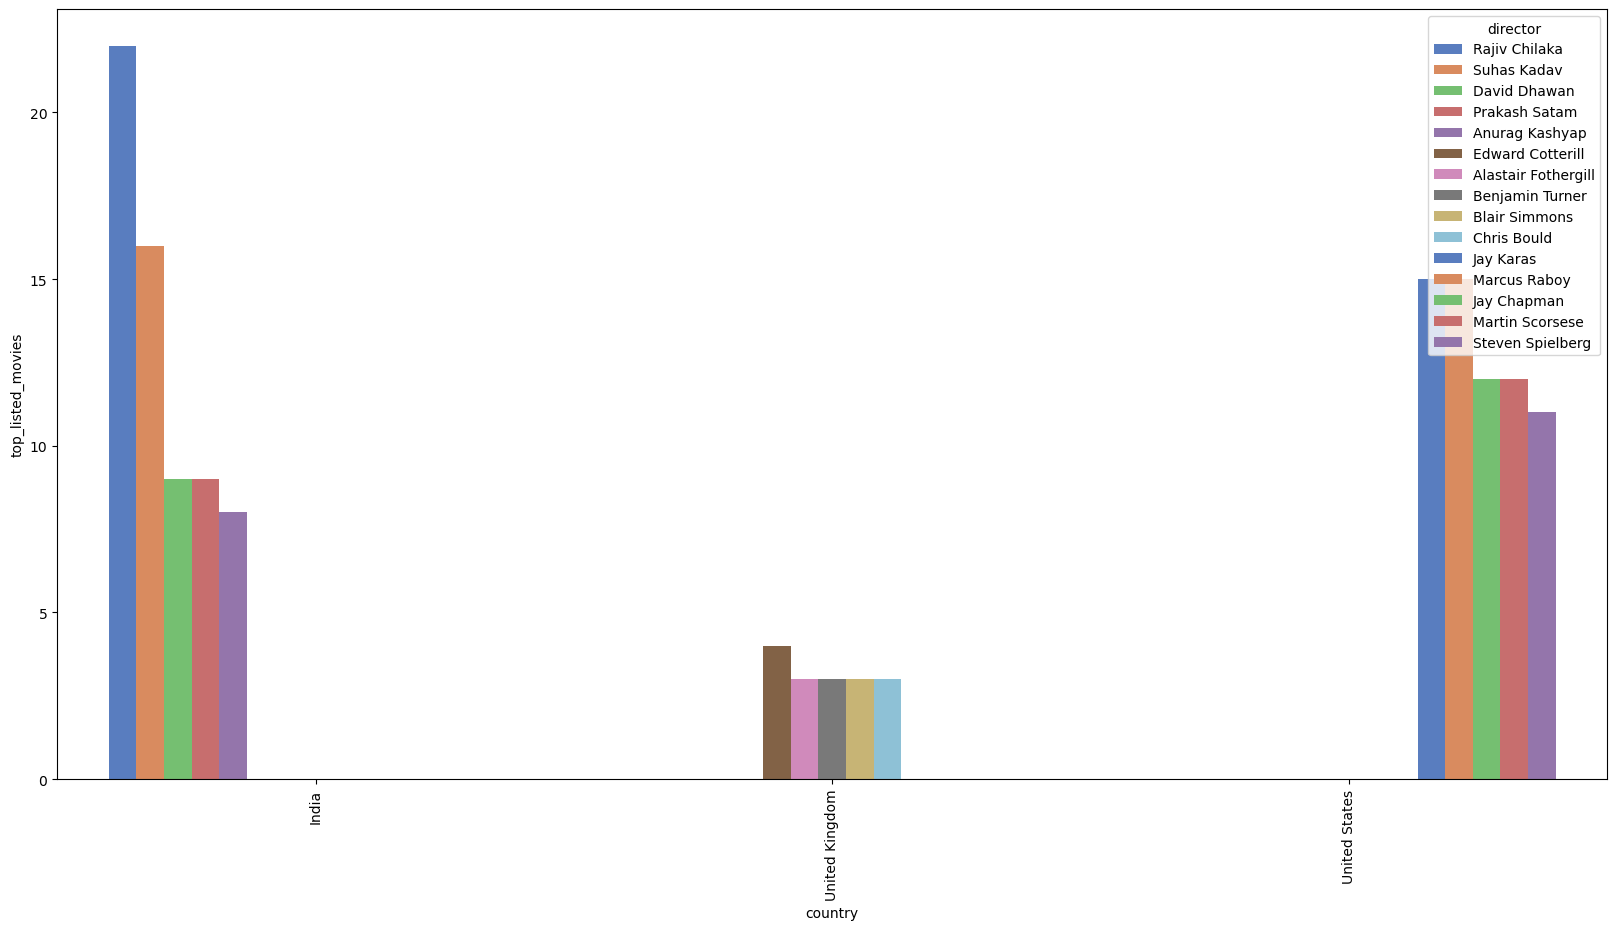

In [4904]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = director_country_mov.loc[(director_country_mov["country"].isin(top_n_country_mov[:3].index))],
    x= "country",
    y="top_listed_movies",
    hue="director",
    palette = "muted"
)
plt.xticks(rotation=90)
plt.show()

###### TV

In [4905]:
director_country_tv = exp_tv[(exp_tv["country"]!="")].dropna().groupby(["show_id","country","director"]).size().reset_index().drop("show_id",axis=1)
director_country_tv = director_country_tv.groupby(["country","director"]).size().reset_index()
director_country_tv = director_country_tv.groupby("country").apply(lambda x: x.nlargest(5,0)).reset_index(drop=True).rename({0:"top_listed_movies"},axis=1)
director_country_tv.head()

,country,director,top_listed_movies
0,Angola,Gerhard Mostert,1
1,Argentina,Hernán Guerschuny,4
2,Argentina,Billy Corben,1
3,Australia,Alicky Sussman,5
4,Australia,Eddie Martin,3


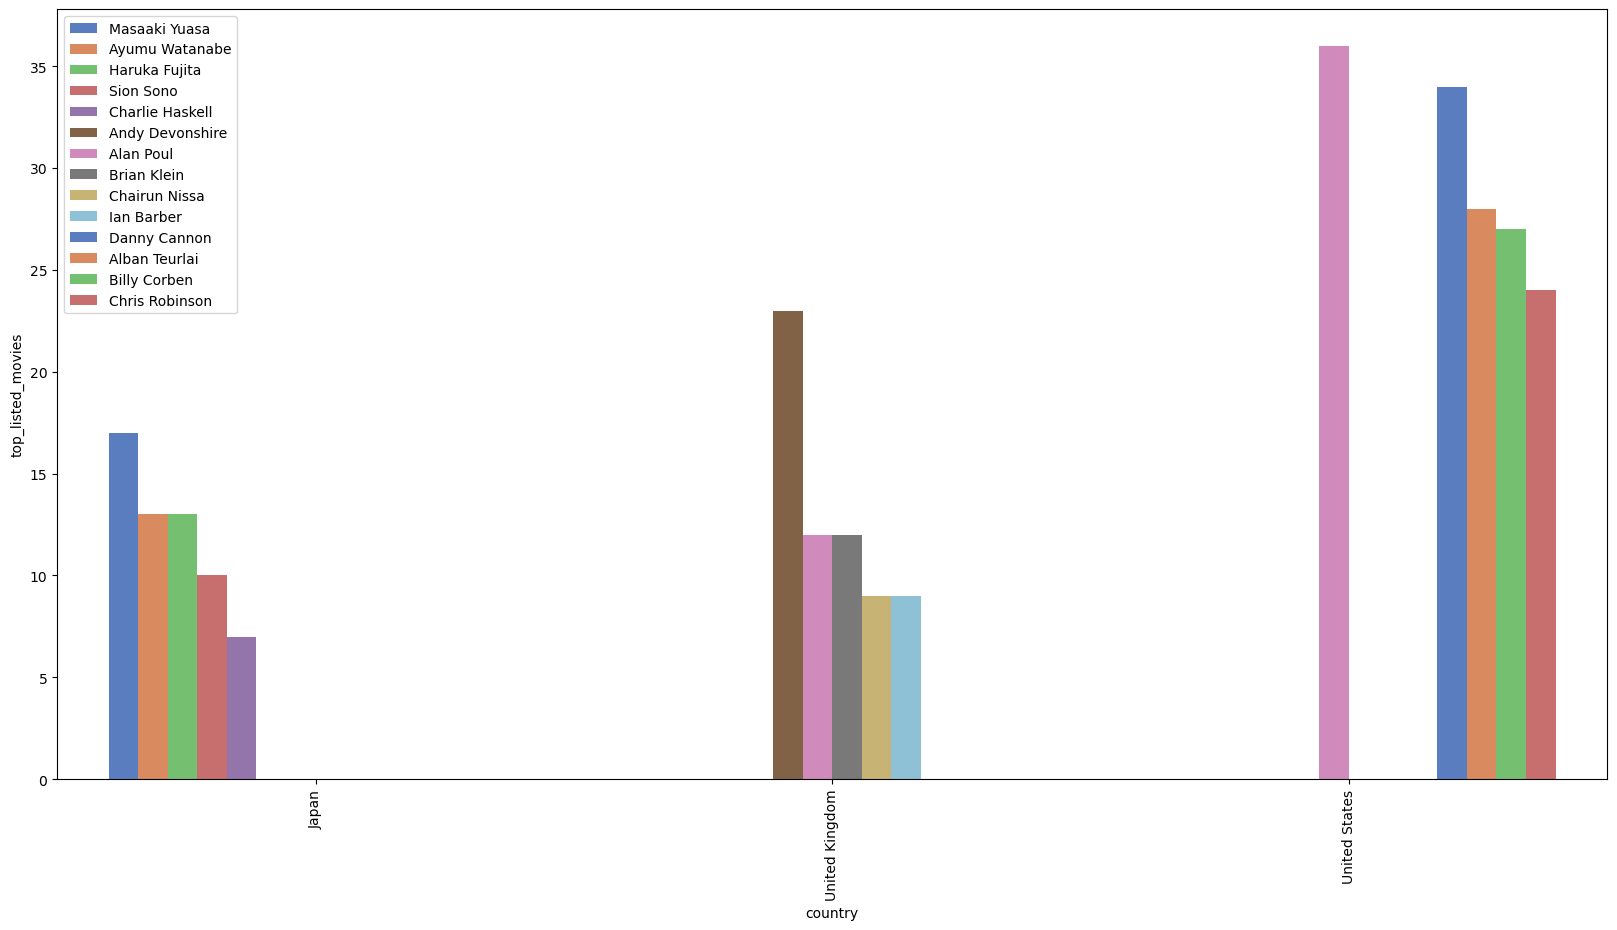

In [4906]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = director_country_tv.loc[(director_country_tv["country"].isin(top_n_country_tv[:3].index))],
    x= "country",
    y="top_listed_movies",
    hue="director",
    palette = "muted"
)
plt.xticks(rotation=90)
plt.legend()
plt.show()

##### 3.5.2.7 Genre - Release Year

###### Movies

In [4907]:
year_country_genre_mov = exp_mov[exp_mov["country"]!=""].groupby(["show_id","country","listed_in","release_year"]).size().reset_index()
year_country_genre_mov = year_country_genre_mov.groupby(["country","listed_in","release_year"]).size().reset_index()
year_country_genre_mov

,country,listed_in,release_year,0
0,Afghanistan,Documentaries,2016,1
1,Afghanistan,International Movies,2016,1
2,Albania,Dramas,2018,1
3,Albania,International Movies,2018,1
4,Algeria,Classic Movies,1979,1
...,...,...,...,...
4938,Zimbabwe,Documentaries,2014,1
4939,Zimbabwe,Documentaries,2017,1
4940,Zimbabwe,International Movies,2014,1
4941,Zimbabwe,International Movies,2017,2


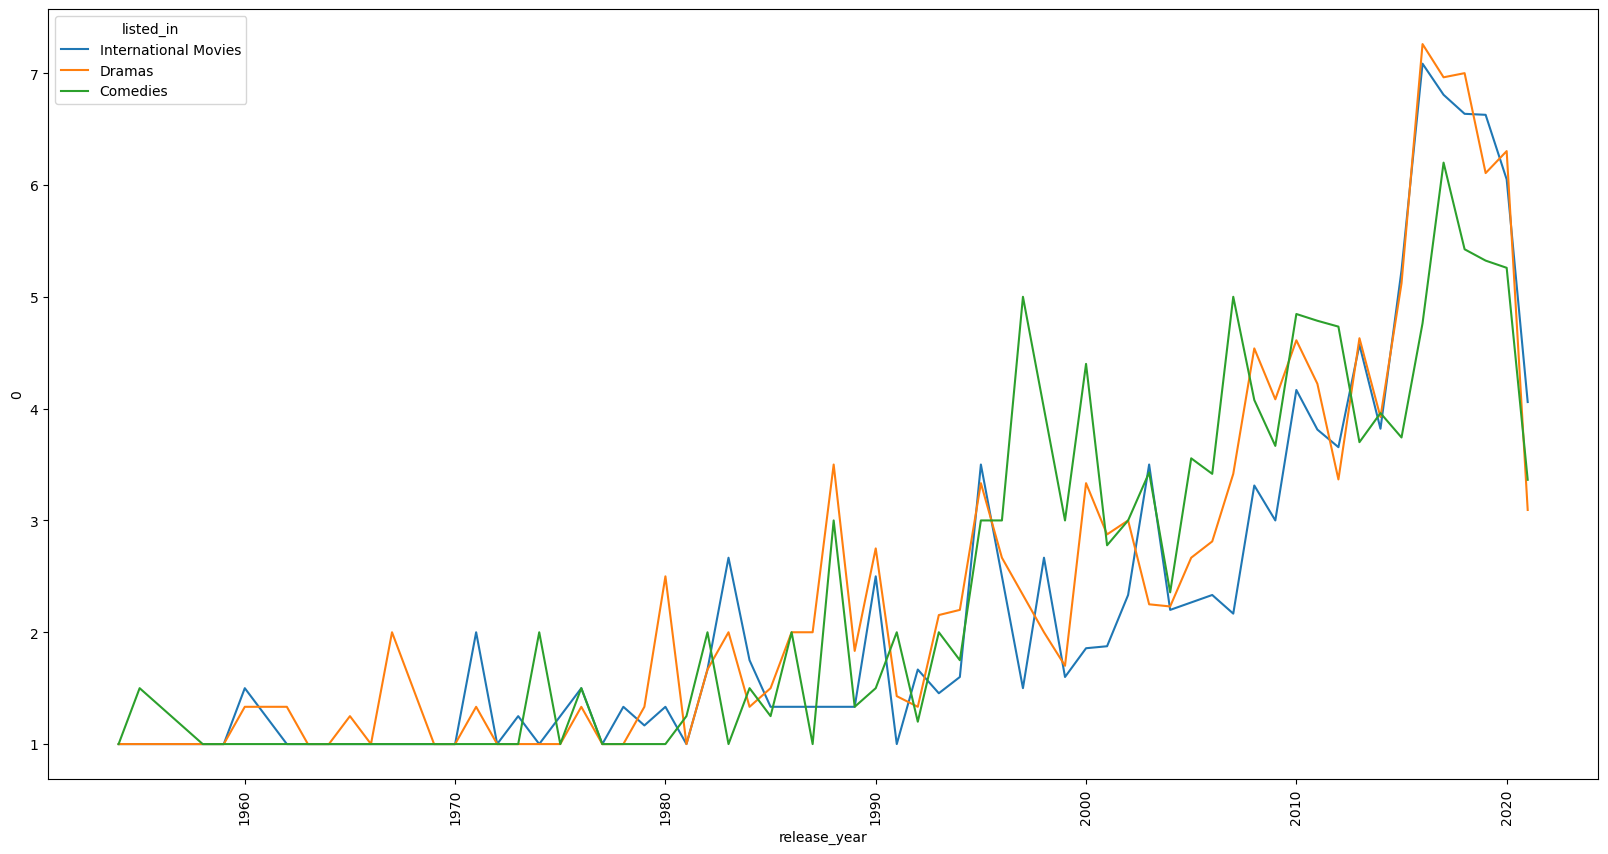

In [4942]:
plt.figure(figsize=(20,10))
sns.lineplot(
    data = year_country_genre_mov.loc[(year_country_genre_mov["listed_in"].isin(top_n_genre_mov.index[:3]))],
    y= 0,
    x="release_year",
    hue="listed_in",
    err_style = None
)
plt.xticks(rotation=90)
plt.show()

- Present popular genre is **International Content**

###### TV

In [4909]:
year_country_genre_tv = exp_tv[exp_tv["country"]!=""].groupby(["show_id","country","listed_in","release_year"]).size().reset_index()
year_country_genre_tv = year_country_genre_tv.groupby(["country","listed_in","release_year"]).size().reset_index()
year_country_genre_tv

,country,listed_in,release_year,0
0,Angola,TV Shows,2020,1
1,Argentina,Classic & Cult TV,2020,1
2,Argentina,Crime TV Shows,2015,1
3,Argentina,Crime TV Shows,2018,1
4,Argentina,Crime TV Shows,2019,2
...,...,...,...,...
2069,United States,Teen TV Shows,2020,7
2070,United States,Teen TV Shows,2021,5
2071,West Germany,International TV Shows,1972,1
2072,West Germany,TV Comedies,1972,1


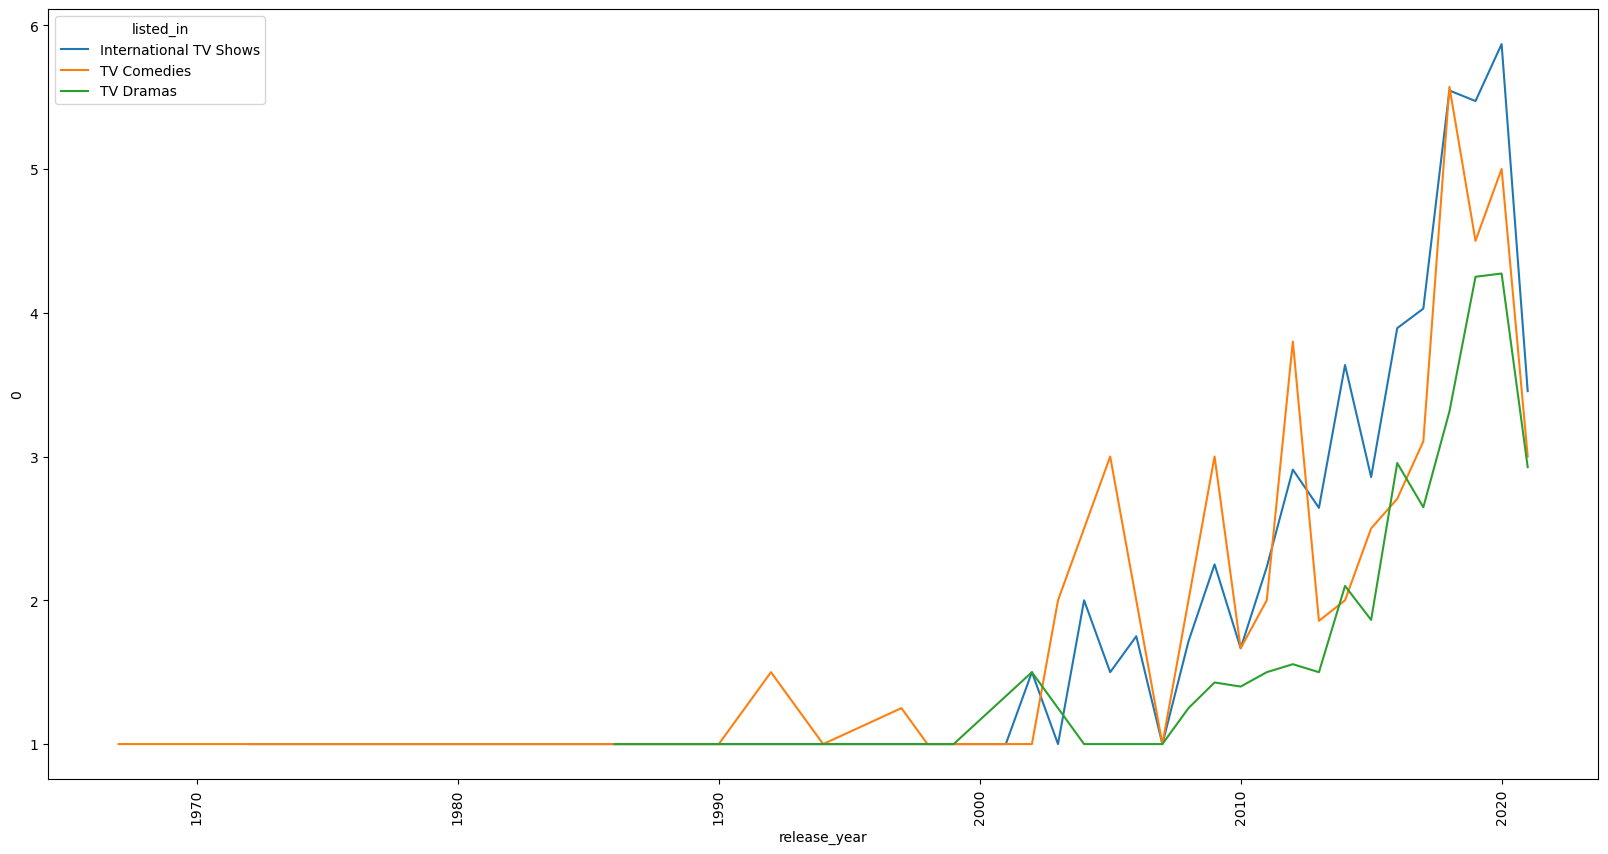

In [4910]:
plt.figure(figsize=(20,10))
sns.lineplot(
    data = year_country_genre_tv.loc[(year_country_genre_tv["listed_in"].isin(top_n_genre_tv.index[:3]))],
    y= 0,
    x="release_year",
    hue="listed_in",
    err_style= None
)
plt.xticks(rotation=90)
plt.show()

- Present popular genre is **Kids TV**

##### 3.5.2.8 Cast - Release_Year

###### Movies

In [4926]:
top_n_cast_mov = exp_mov.groupby(["show_id","cast"]).size().reset_index()["cast"].value_counts()[:5]
top_n_cast_mov

Anupam Kher         44
Shah Rukh Khan      35
Om Puri             32
Naseeruddin Shah    32
Akshay Kumar        32
Name: cast, dtype: int64

In [4927]:
year_country_cast_mov = exp_mov[exp_mov["country"]!=""].groupby(["show_id","country","cast","release_year"]).size().reset_index()
year_country_cast_mov = year_country_cast_mov.groupby(["country","cast","release_year"]).size().reset_index()
year_country_cast_mov

,country,cast,release_year,0
0,Afghanistan,Sohrab Nazari,2016,1
1,Albania,Claudio Santamaria,2018,1
2,Albania,Flonja Kodheli,2018,1
3,Albania,Jerzy Stuhr,2018,1
4,Albania,Marco Giallini,2018,1
...,...,...,...,...
54353,Zimbabwe,Kudzai Sevenzo,2017,1
54354,Zimbabwe,Michael Kudakwashe,2017,1
54355,Zimbabwe,Tendai Nguni,2017,1
54356,Zimbabwe,Tendaiishe Chitima,2017,1


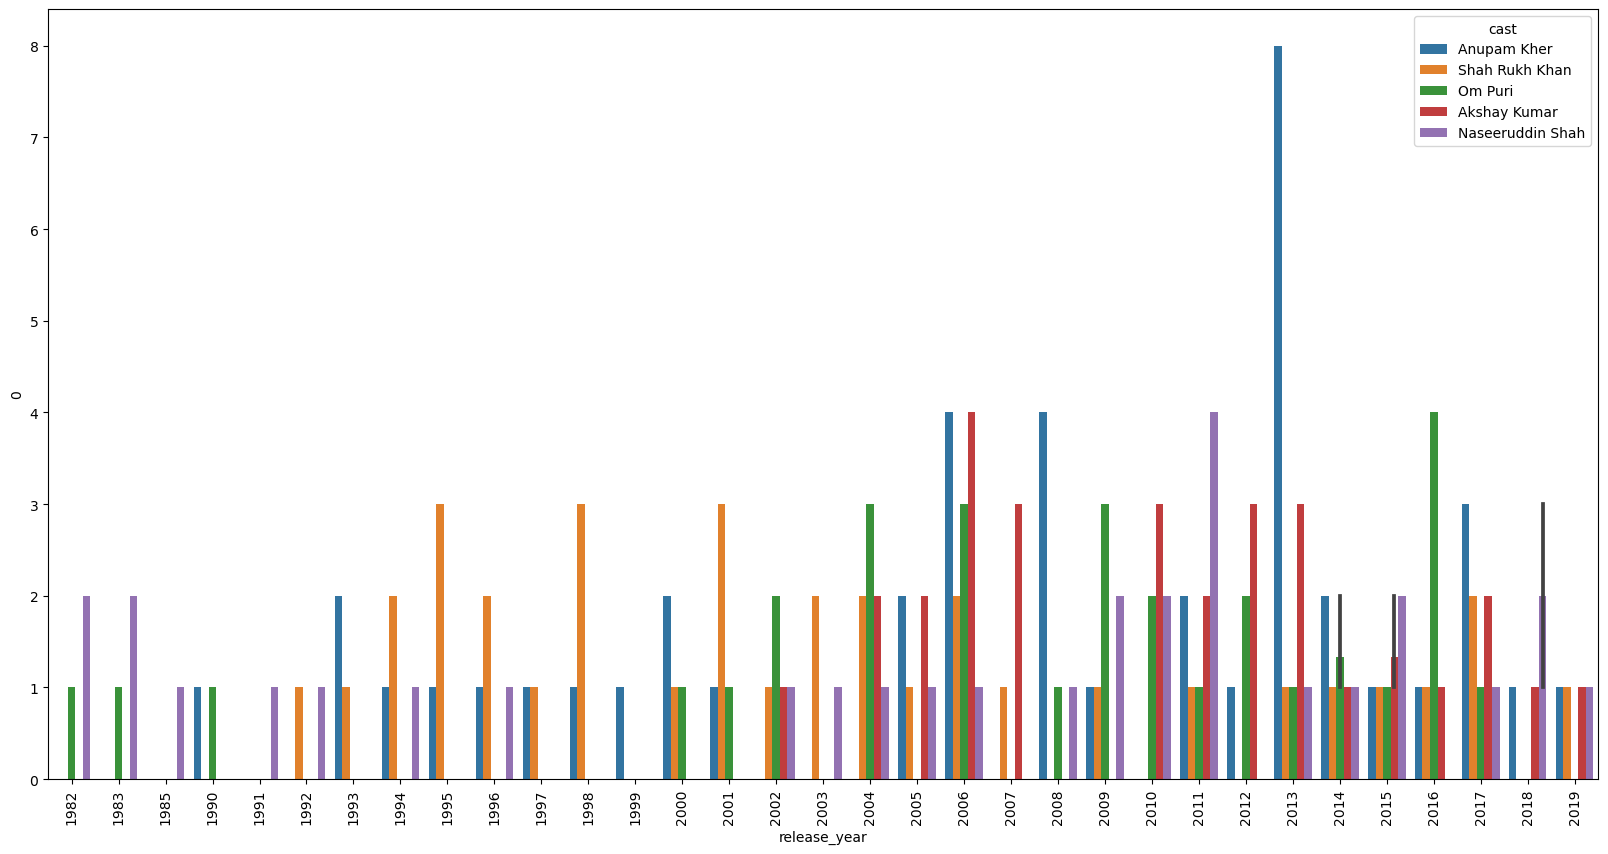

In [4938]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = year_country_cast_mov.loc[(year_country_cast_mov["cast"].isin(top_n_cast_mov.index[:5]))],
    y= 0,
    x="release_year",
    hue="cast",
)
plt.xticks(rotation=90)
plt.show()

- Akshay Kumar, Nasserudin Shah popular cast on Netflix righ now

###### TV

In [4931]:
top_n_cast_tv = exp_tv.groupby(["show_id","cast"]).size().reset_index()["cast"].value_counts()[:5]
top_n_cast_tv

Takahiro Sakurai    24
Ben Schwartz        22
Mike Colter         22
Tamara Taylor       21
Joey Diaz           21
Name: cast, dtype: int64

In [4932]:
year_country_cast_tv = exp_tv[exp_tv["country"]!=""].groupby(["show_id","country","cast","release_year"]).size().reset_index()
year_country_cast_tv = year_country_cast_tv.groupby(["country","cast","release_year"]).size().reset_index()
year_country_cast_tv

,country,cast,release_year,0
0,Angola,Anthony Oseyemi,2020,1
1,Angola,Chioma Omeruah,2020,1
2,Angola,Emeka Nwagbaraocha,2020,1
3,Angola,Flora Chiedo,2020,1
4,Angola,Hakeem Kae-Kazim,2020,1
...,...,...,...,...
20835,West Germany,Roland Mqwebu,1986,1
20836,West Germany,Roy Dotrice,1986,1
20837,West Germany,Terry Jones,1972,1
20838,West Germany,Trevor Howard,1986,1


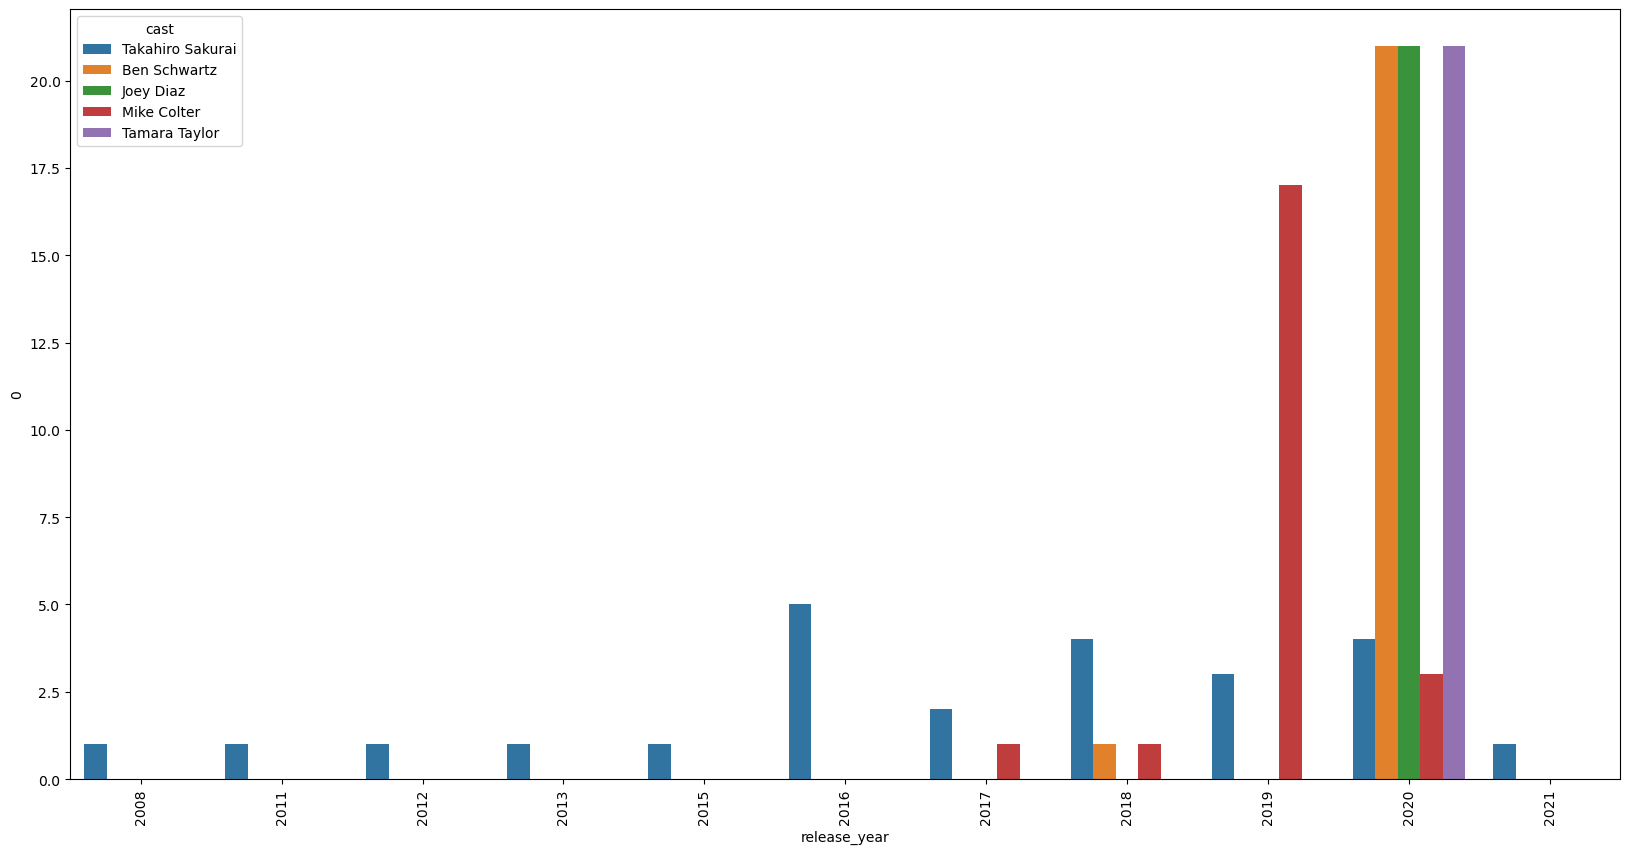

In [4935]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = year_country_cast_tv.loc[(year_country_cast_tv["cast"].isin(top_n_cast_tv.index[:5]))],
    y= 0,
    x="release_year",
    hue="cast"
)
plt.xticks(rotation=90)
plt.show()

- Takhiro Sakurai famous cast for right now
- Ben Schwartsz, Joey Duaz, Tamara Taylor trending around 2020

#### 3.5.3 Correlation

##### 3.5.3.1 TV

<AxesSubplot:>

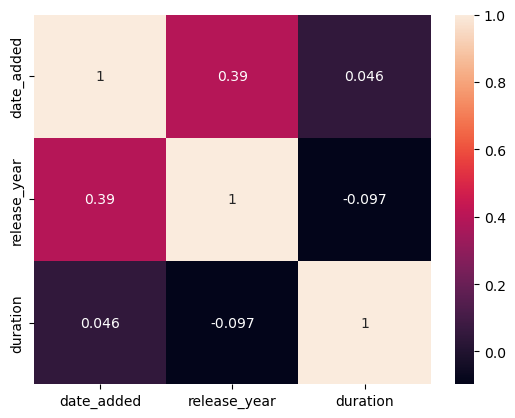

In [4911]:
tv_back = tv.copy()
tv_back["release_year"] = tv["release_year"] .astype("int64")
tv_back["duration"] = tv["duration"].astype("int64")
tv_back["date_added"] = tv["date_added"].dt.year

sns.heatmap(tv_back.corr(),annot=True)

- release_year & date added mildly positive correlated

##### 3.5.3.1 Movies

<AxesSubplot:>

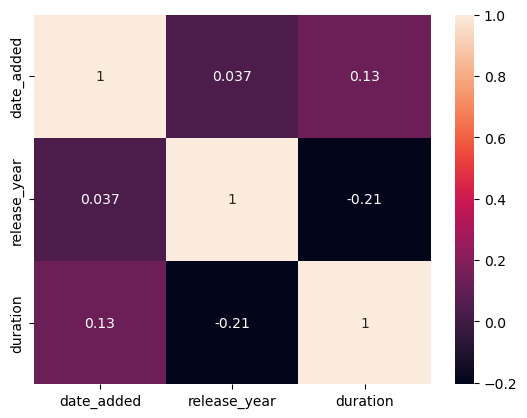

In [4912]:
mov_back = movies.copy()
mov_back["release_year"] = movies["release_year"] .astype("int64")
mov_back["date_added"] = movies["date_added"].dt.year

sns.heatmap(mov_back.corr(),annot=True)

- release_year & duration mildly negative correlated

### 3.6 Missing Value / Outliers

- All posiible impurtation has been done under Preprocessing
- A notable pattern observed is the absence of directors for TV shows. This can be attributed to the nature of TV shows, where they span a longer period and each episode may have a different director. Additionally, TV shows often have a creative producer who oversees the overall vision and direction of the show. As a result, the role of individual directors may be less prominent in TV shows compared to movies.

In [4913]:
movies.isna().sum()

show_id           0
type              0
title             0
director         31
cast            105
country          67
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [4914]:
tv.isna().sum()

show_id            0
type               0
title              0
director        1035
cast              17
country           13
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

#### 3.6.1 Outlier check

##### 3.6.1.1 Duration

###### Movies

<AxesSubplot:>

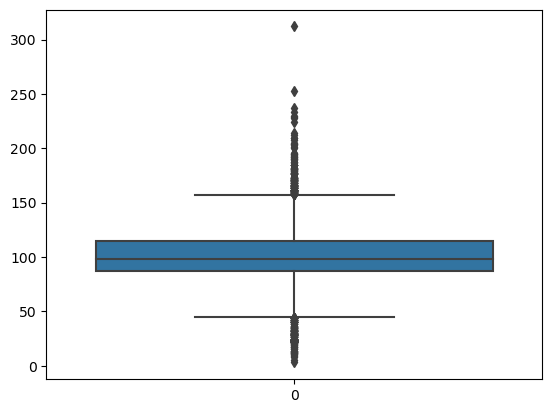

In [4915]:
sns.boxplot(movies["duration"])

- Outliers present in both Upper and Lower whisker
- Median is 100

###### TV

<AxesSubplot:xlabel='duration', ylabel='Count'>

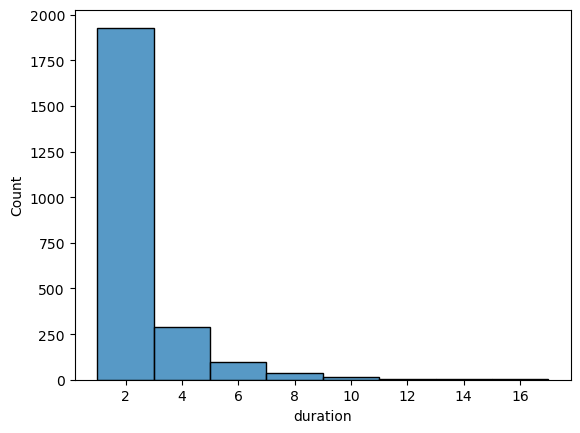

In [4916]:
sns.histplot(tv["duration"].astype("int64"), bins=8)

In [4917]:
tv["duration"].astype("int64").median()

1.0

- Outliers present in Upper whisker
- Median is 1 season

##### 3.6.1.2 Release Year

###### Movies

<AxesSubplot:>

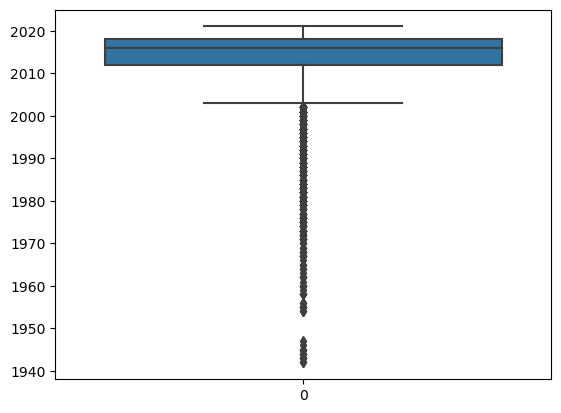

In [4918]:
sns.boxplot(movies["release_year"])

- Outliers present in Lower whisker
- Median is 2016

###### TV

<AxesSubplot:>

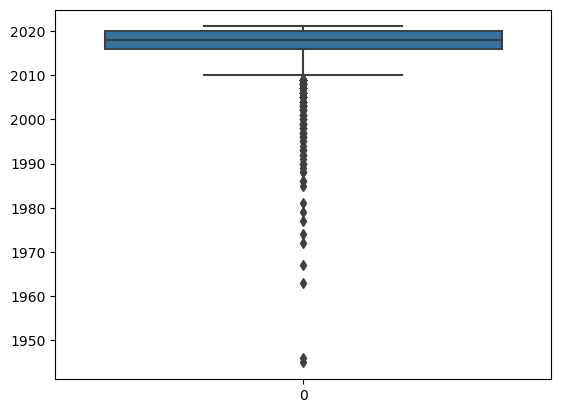

In [4919]:
sns.boxplot(tv["release_year"].reset_index()["release_year"])

- Outliers present in Lower whisker
- Median is 2018

##### 3.6.1.3 Date Added

###### Movies

<AxesSubplot:>

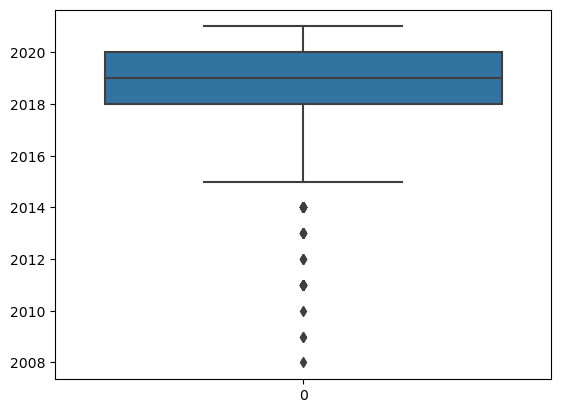

In [4920]:
sns.boxplot(movies["date_added"].dt.year)

- Outliers present in Lower whisker
- Median is 2019

###### TV

<AxesSubplot:>

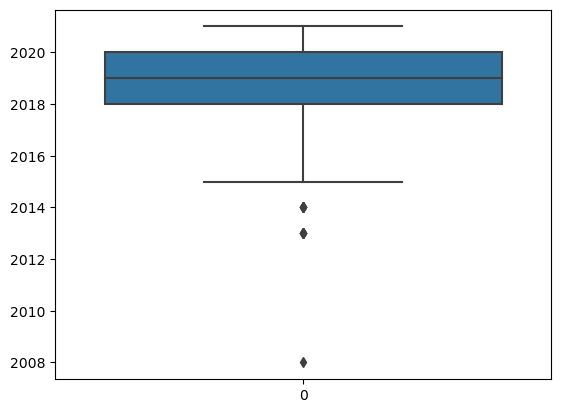

In [4921]:
sns.boxplot(tv["date_added"].reset_index()["date_added"].dt.year)

- Outliers present in Lower whisker
- Median is 2019

## 4. Insights

### 4.1 Business Insights

- Netflix is popular in Japan, India, France, South Korea, Canada, the United Kingdom, and the United States.
- International movies and TV shows are the most commonly watched genre on Netflix, As of 2020, there was a noticeable trend in content consumption on Netflix towards international content.
- Popular genres apart from above include action, dramas, comedies, documentaries, crime TV shows, and kids TV shows.
- Netflix features explicit content, with Restricted (R) ratings for movies and TV-MA (Mature Adult) ratings for TV shows.
- In India, there is relatively less content curated around the Restricted (R) rating.
- Comedies are more popular in English-speaking countries.
- On average, Netflix takes approximately 2 years (median) to add new content after its initial release.
- India prefers longer-duration movies, while Canada favors longer TV shows.
- The average duration for TV shows on Netflix is approximately 1 season and for movie is 100 minutes.

### 4.2 Recommendations

- Explore diverse international content: Given the popularity of international content among users, Netflix should actively seek and curate content from different countries. This can help attract a wider customer base by offering a diverse range of options.
- Focus on popular genres: Creating content in popular genres is essential, as they have proven success worldwide. By capitalizing on these genres, Netflix can increase its chances of attracting and retaining viewers.
    - The success of Netflix TV shows is closely tied to the duration of their seasons. It has been observed that the average season run is typically limited to 1 season. To improve this metric, Netflix can consider investing in genres and cast that have a proven track record of success on the platform. For example, genres like Crime TV Shows tend to have a higher likelihood of receiving repeat seasons. By focusing on such genres and cultivating a loyal audience, Netflix can increase user engagement and retention on the platform.
- Cater to explicit content preferences: Netflix's explicit content has been a significant draw for users. Focusing on this format and catering to audiences seeking mature content can help solidify Netflix's position in this niche.
- Curate content for specific markets: In India, there is a potential untapped audience for R-rated content. By curating more content that aligns with the preferences of Indian viewers seeking such content, Netflix can capture their attention and expand its user base.
- Add a variety of older films: Quickly adding older films to the platform can cater to the audience in the older age group who appreciate classic movies. Expanding the selection of timeless films can attract and engage this particular demographic.
- Adapt content duration: Considering that many countries prefer shorter content, creating shorter formats can better accommodate the viewing habits of users in those regions. This approach can improve user satisfaction and increase engagement.
- Highlight popular cast members: To grab audience attention, Netflix should suggest content featuring popular actors and actresses from each country. Leveraging the popularity of local cast members can increase interest and engagement.
- Faster Content Updation: To attract more customers, Netflix should prioritize improving their content addition time. Currently, it takes approximately two years for Netflix to add new content after its initial release. However, reducing this timeframe to a maximum of six months can significantly enhance the platform's appeal. By ensuring that the latest content becomes available on Netflix within a shorter period, Netflix can cater to viewers who prefer timely access to fresh and trending content. This approach will help Netflix attract a larger customer base, increase subscriber numbers, and improve overall user satisfaction.
